## Set Up

In [271]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder

warnings.filterwarnings('ignore')

# Define possible dataset paths.
paths = [
    '../datasets/_integrated_data/dropped-column-if-missing-value/data.csv',                            # 0  - Annual  : Dropped column if missing value
    '../datasets/_integrated_data/dropped-column-if-missing-value/data-gendered.csv',                   # 1  - Annual  : Dropped column if missing value         - Gendered
    '../datasets/_integrated_data/dropped-row-if-missing-value/data.csv',                               # 2  - Annual  : Dropped row if missing value
    '../datasets/_integrated_data/dropped-row-if-missing-value/data-gendered.csv',                      # 3  - Annual  : Dropped row if missing value            - Gendered
    '../datasets/_integrated_data/missing-pollutant-values-as-NA/data.csv',                             # 4  - Annual  : Missing pollutant values as NA
    '../datasets/_integrated_data/missing-pollutant-values-as-NA/data-gendered.csv',                    # 5  - Annual  : Missing pollutant values as NA          - Gendered
    '../datasets/_integrated_data/missing-pollutant-values-as-NaN/data.csv',                            # 6  - Annual  : Missing pollutant values as NaN
    '../datasets/_integrated_data/missing-pollutant-values-as-NaN/data-gendered.csv',                   # 7  - Annual  : Missing pollutant values as NaN         - Gendered
    '../datasets/_integrated_data/missing-pollutant-values-filled-somehow/data.csv',                    # 8  - Annual  : Missing pollutant values filled somehow
    '../datasets/_integrated_data/missing-pollutant-values-filled-somehow/data-gendered.csv',           # 9  - Annual  : Missing pollutant values filled somehow - Gendered
    '../datasets/_integrated_data/monthly/dropped-column-if-missing-value/data.csv',                    # 10 - Monthly : Dropped column if missing value
    '../datasets/_integrated_data/monthly/dropped-column-if-missing-value/data-gendered.csv',           # 11 - Monthly : Dropped column if missing value         - Gendered
    '../datasets/_integrated_data/monthly/dropped-row-if-missing-value/data.csv',                       # 12 - Monthly : Dropped row if missing value
    '../datasets/_integrated_data/monthly/dropped-row-if-missing-value/data-gendered.csv',              # 13 - Monthly : Dropped row if missing value            - Gendered
    '../datasets/_integrated_data/monthly/missing-pollutant-values-as-NA/data.csv',                     # 14 - Monthly : Missing pollutant values as NA
    '../datasets/_integrated_data/monthly/missing-pollutant-values-as-NA/data-gendered.csv',            # 15 - Monthly : Missing pollutant values as NA          - Gendered
    '../datasets/_integrated_data/monthly/missing-pollutant-values-as-NaN/data.csv',                    # 16 - Monthly : Missing pollutant values as NaN
    '../datasets/_integrated_data/monthly/missing-pollutant-values-as-NaN/data-gendered.csv',           # 17 - Monthly : Missing pollutant values as NaN         - Gendered
    '../datasets/_integrated_data/monthly/missing-pollutant-values-filled-somehow/data.csv',            # 18 - Monthly : Missing pollutant values filled somehow
    '../datasets/_integrated_data/monthly/missing-pollutant-values-filled-somehow/data-gendered.csv'    # 19 - Monthly : Missing pollutant values filled somehow - Gendered
]

# Choose a dataset.
chosen_dataset = 8

# Load the data
df = pd.read_csv(paths[chosen_dataset])

# Count of number of pollutant features in the dataset
column_list = ['CO ppm', 'NO pphm', 'NO2 pphm', 'OZONE pphm', 'PM10 µg/m³', 'SO2 pphm']
n_pollutants = sum([1 for col in df.columns if col in column_list])

# Efeaturetract pollutant columns and columns after the pollutants
pollutant_columns = [col for col in df.columns if col in column_list]
health_stat_columns = df.iloc[:, df.columns.get_loc(pollutant_columns[-1]) + 1:]

# Show the dataset
print(f"Dataset shape: {df.shape}")
print(f"Number of pollutant features: {n_pollutants}")
df.describe()

Dataset shape: (130, 16)
Number of pollutant features: 6


CO ppm     NO pphm    NO2 pphm  OZONE pphm  PM10 µg/m³    SO2 pphm  \
count  130.000000  130.000000  130.000000  130.000000  130.000000  130.000000   
mean     0.133039    0.547513    0.585202    1.854216   18.511935    0.068814   
std      0.066545    0.671731    0.326022    0.249853    3.468044    0.038708   
min      0.000000    0.055302    0.173631    1.279167   11.923039    0.000000   
25%      0.101596    0.190634    0.327954    1.711455   16.729167    0.039810   
50%      0.133039    0.342790    0.506030    1.861842   18.511935    0.068814   
75%      0.173716    0.632921    0.767641    2.019923   18.981145    0.091701   
max      0.326036    3.079731    1.569617    2.411666   30.798971    0.189220   

       asthma deaths  asthma edp  asthma hospitalisations    asthma pic  \
count     130.000000  130.000000               130.000000    130.000000   
mean        0.759615  363.168462               111.835833   8964.038462   
std         0.241591  133.023553                32.369546   1711.960536   
min         0.300000  126.000000                51.775000   4650.000000   
25%         0.650000  256.100000                89.462500   7887.500000   
50%         0.650000  357.050000               108.675000   9187.500000   
75%         0.868750  448.237500               129.791667   9971.875000   
max         1.425000  740.700000               220.258333  14187.500000   

       copd deaths  copd hospitalisations  iap deaths  iap hospitalisations  
count   130.000000             130.000000  130.000000            130.000000  
mean     25.509231             223.239231    8.498846            324.651538  
std       7.744691              81.116937    2.250424             84.065457  
min       9.400000              60.500000    4.200000            156.300000  
25%      19.225000             162.300000    6.981250            274.200000  
50%      26.950000             232.000000    8.375000            322.100000  
75%      30.356250             266.700000    9.975000            367.775000  
max      51.300000             412.000000   15.000000            540.200000

## EDA of Pollutants to Illness Rates

    financial year             lhd    CO ppm   NO pphm  NO2 pphm  OZONE pphm  \
0        2014/2015   Central Coast -0.498413 -0.469526 -0.364986   -0.253228   
1        2015/2016   Central Coast -0.372700 -0.494434 -0.390646   -0.653097   
2        2016/2017   Central Coast -0.498413 -0.494434 -0.288008   -0.318277   
3        2017/2018   Central Coast -0.372700 -0.556703 -0.441965    0.027993   
4        2018/2019   Central Coast -0.372700 -0.494434 -0.518944   -0.485687   
..             ...             ...       ...       ...       ...         ...   
125      2019/2020  Western Sydney  1.219240  0.392980  0.579596    0.519461   
126      2020/2021  Western Sydney  0.821570  0.199863  0.526682   -0.535910   
127      2021/2022  Western Sydney  0.318719  0.047305  0.340651   -1.021400   
128      2022/2023  Western Sydney -0.021565  0.205995  0.345846   -0.889117   
129      2023/2024  Western Sydney -0.171924  0.085149  0.785668   -0.458731   

       PM10 µg/m³  SO2 pphm  asthma dea

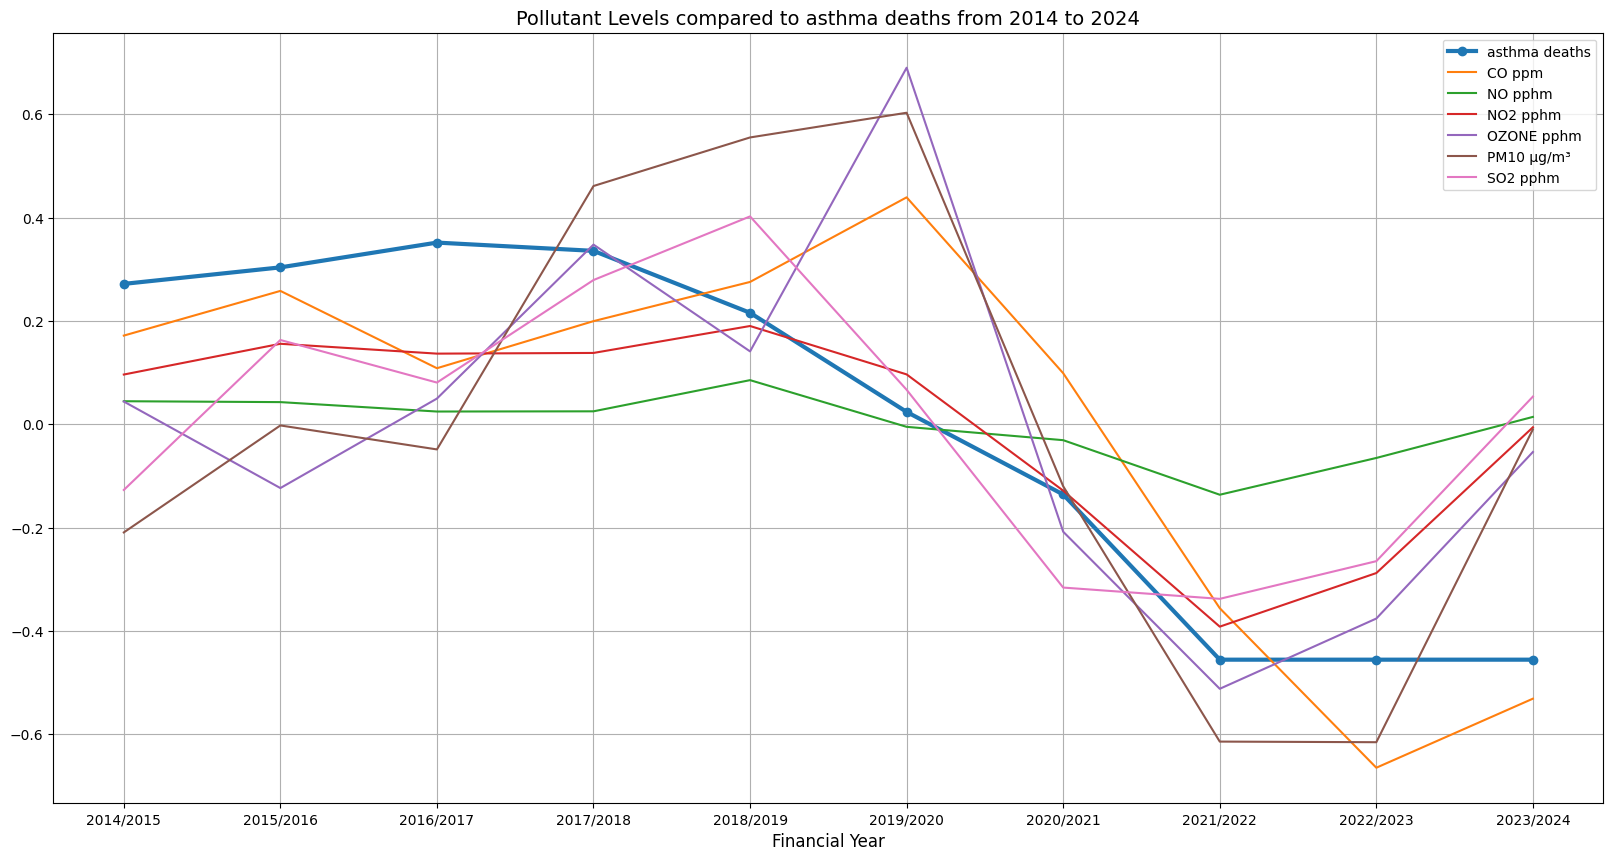

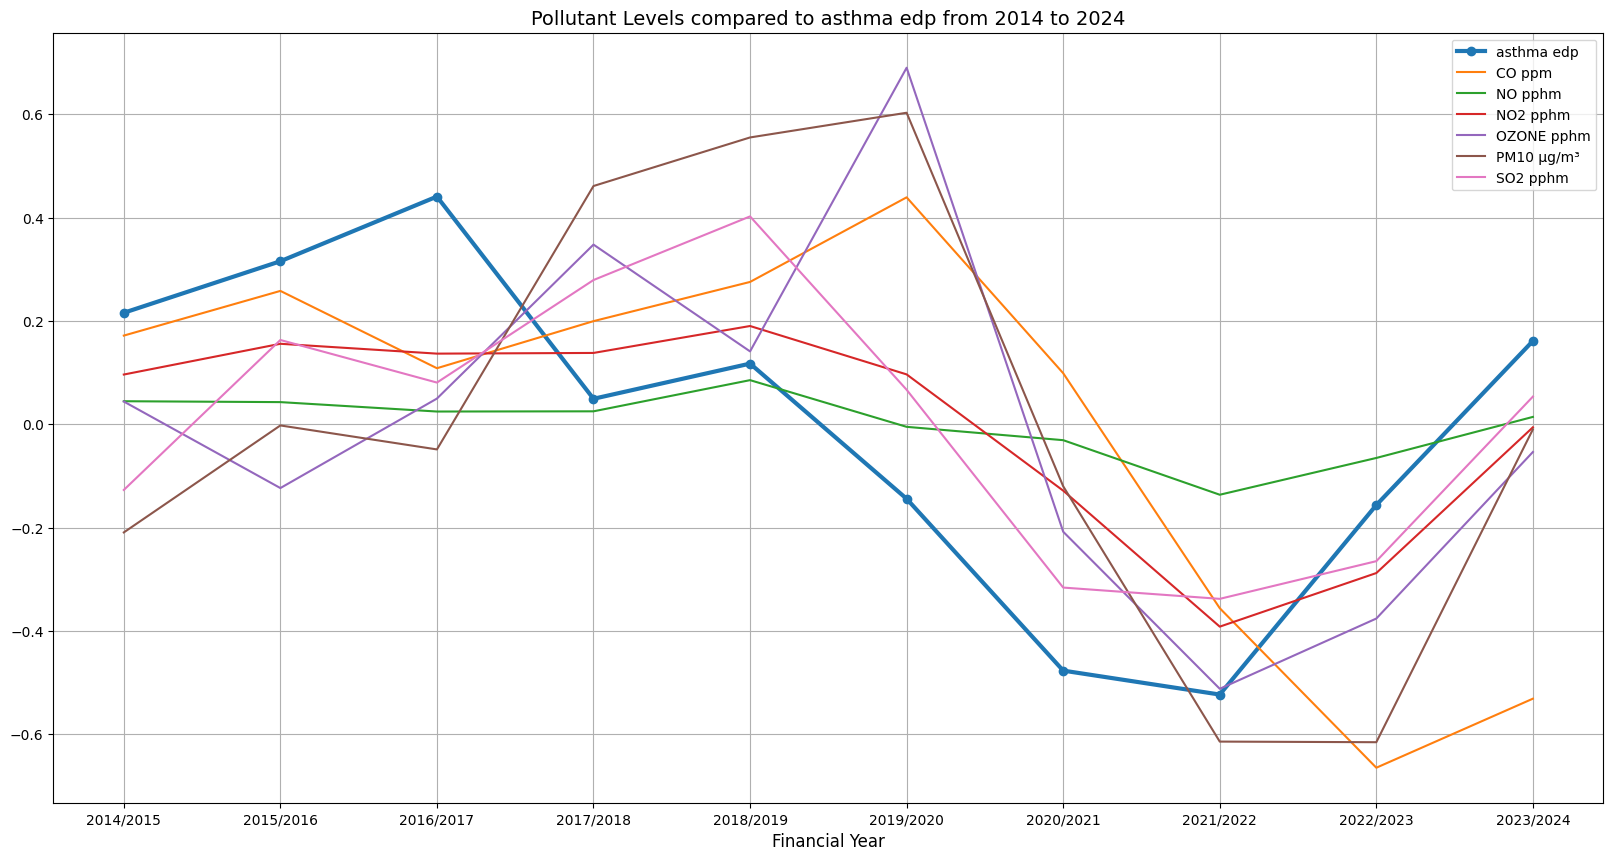

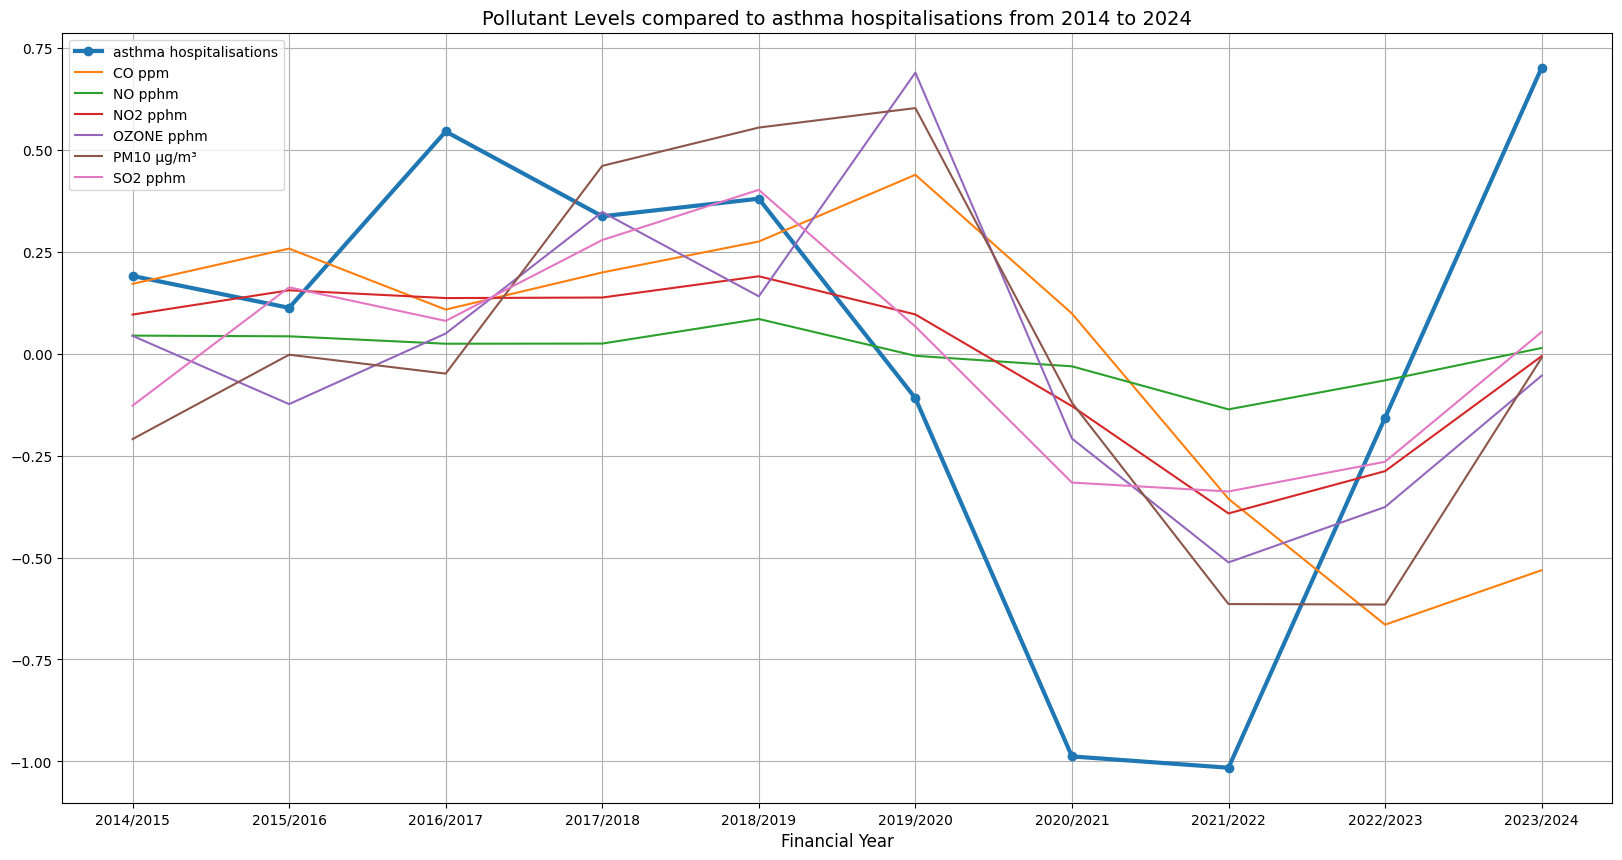

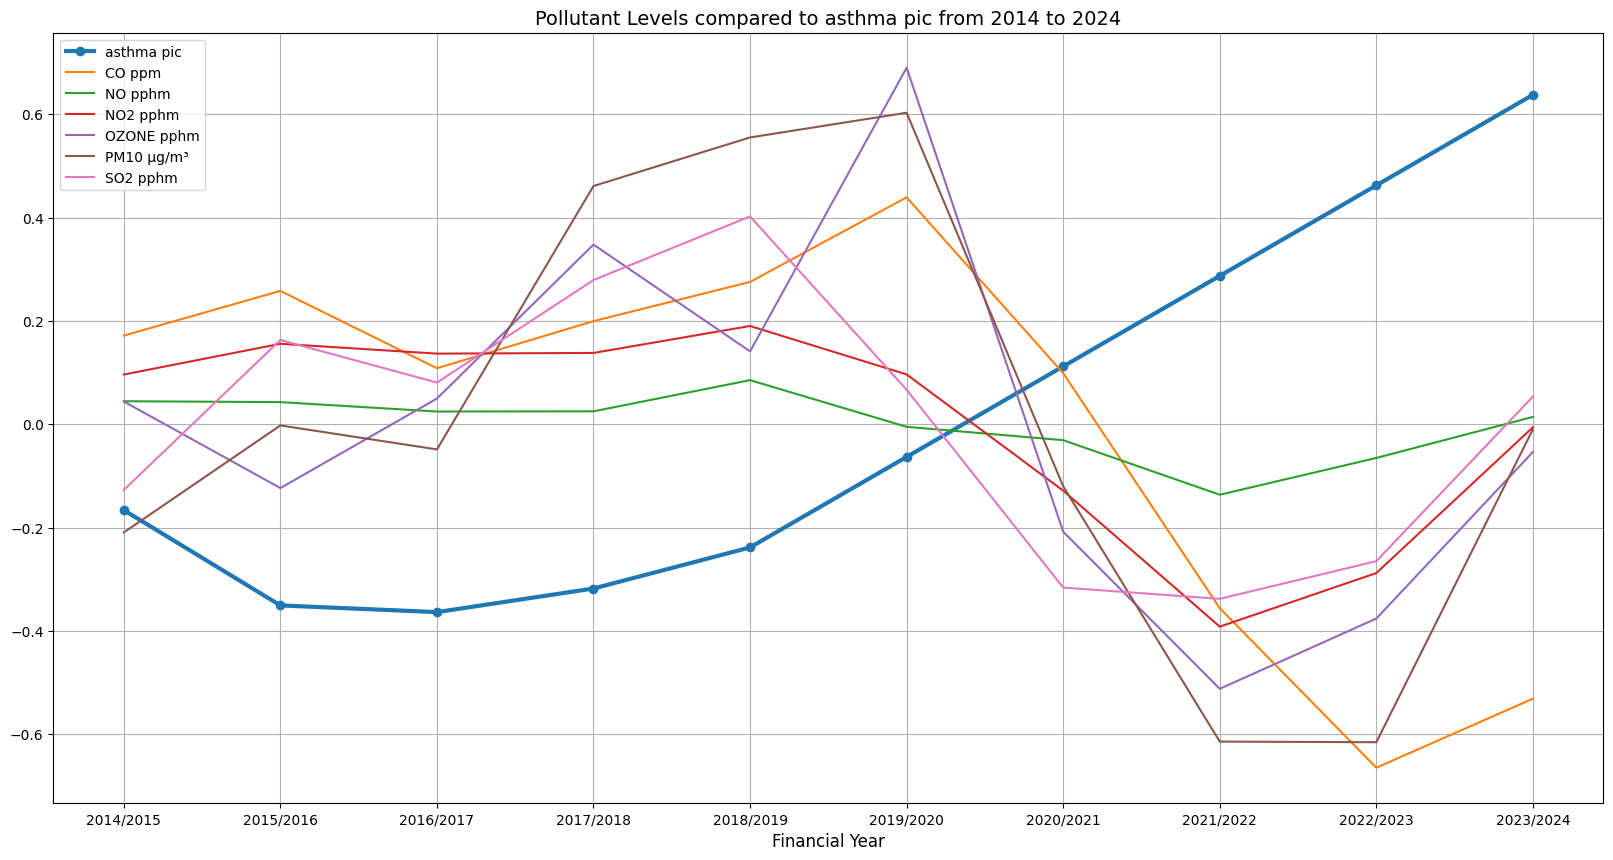

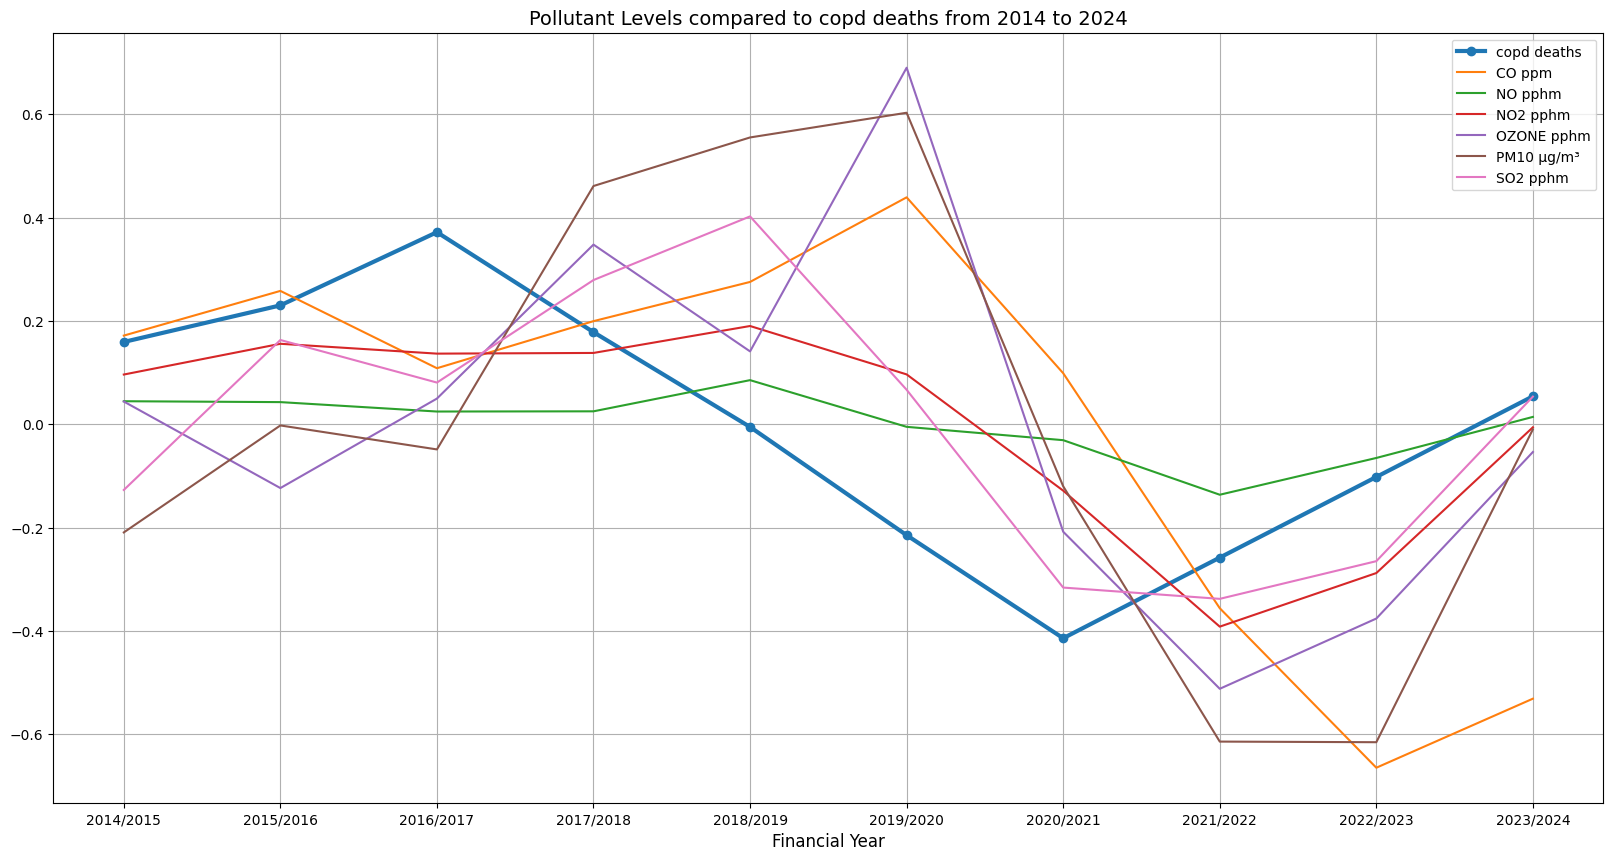

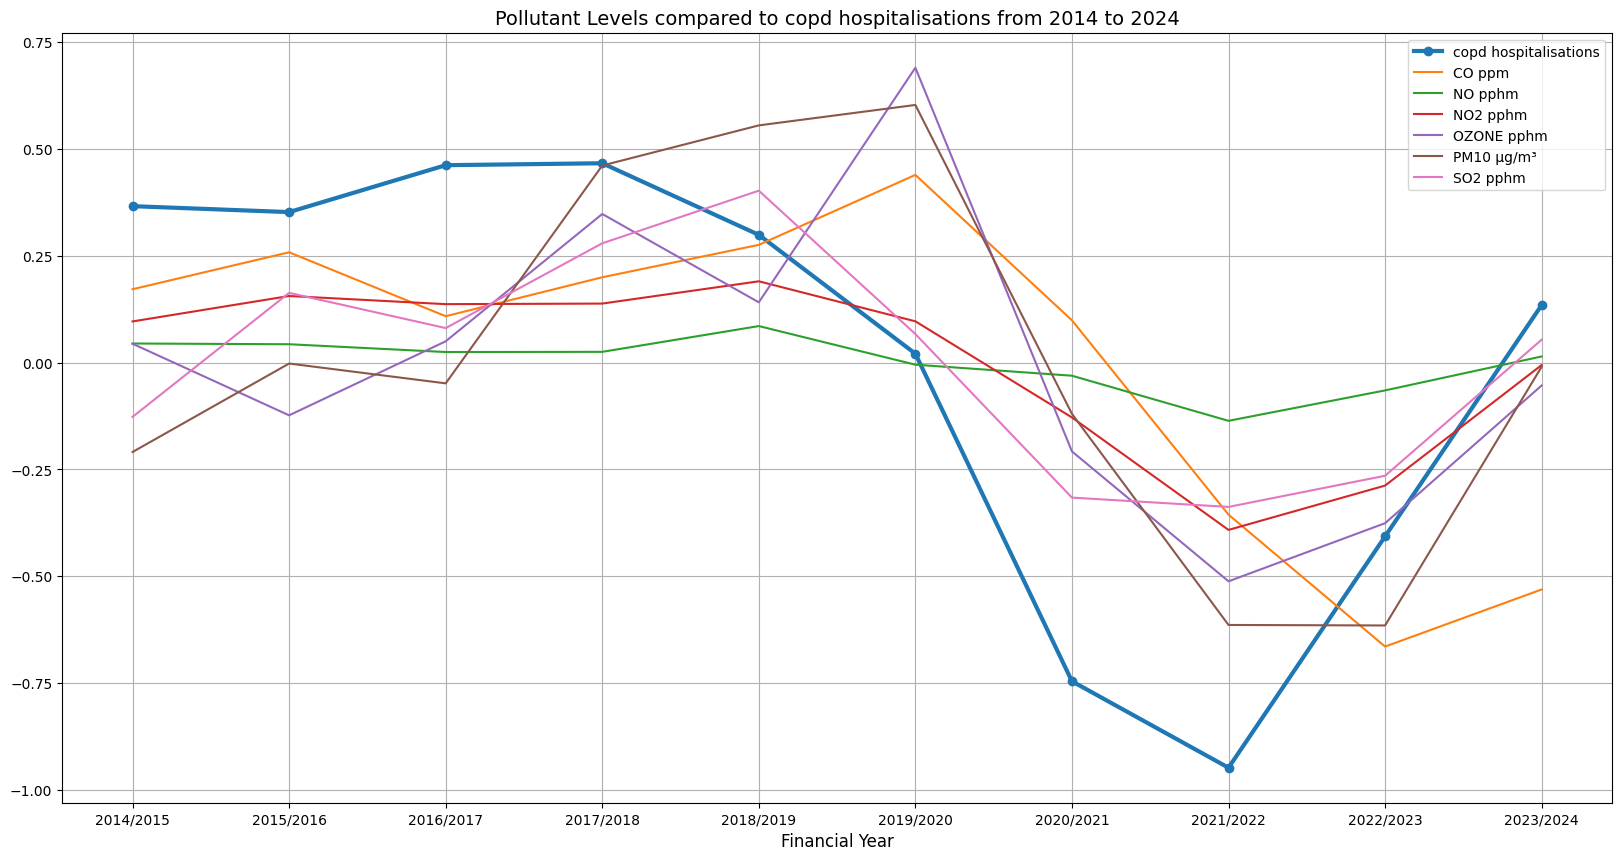

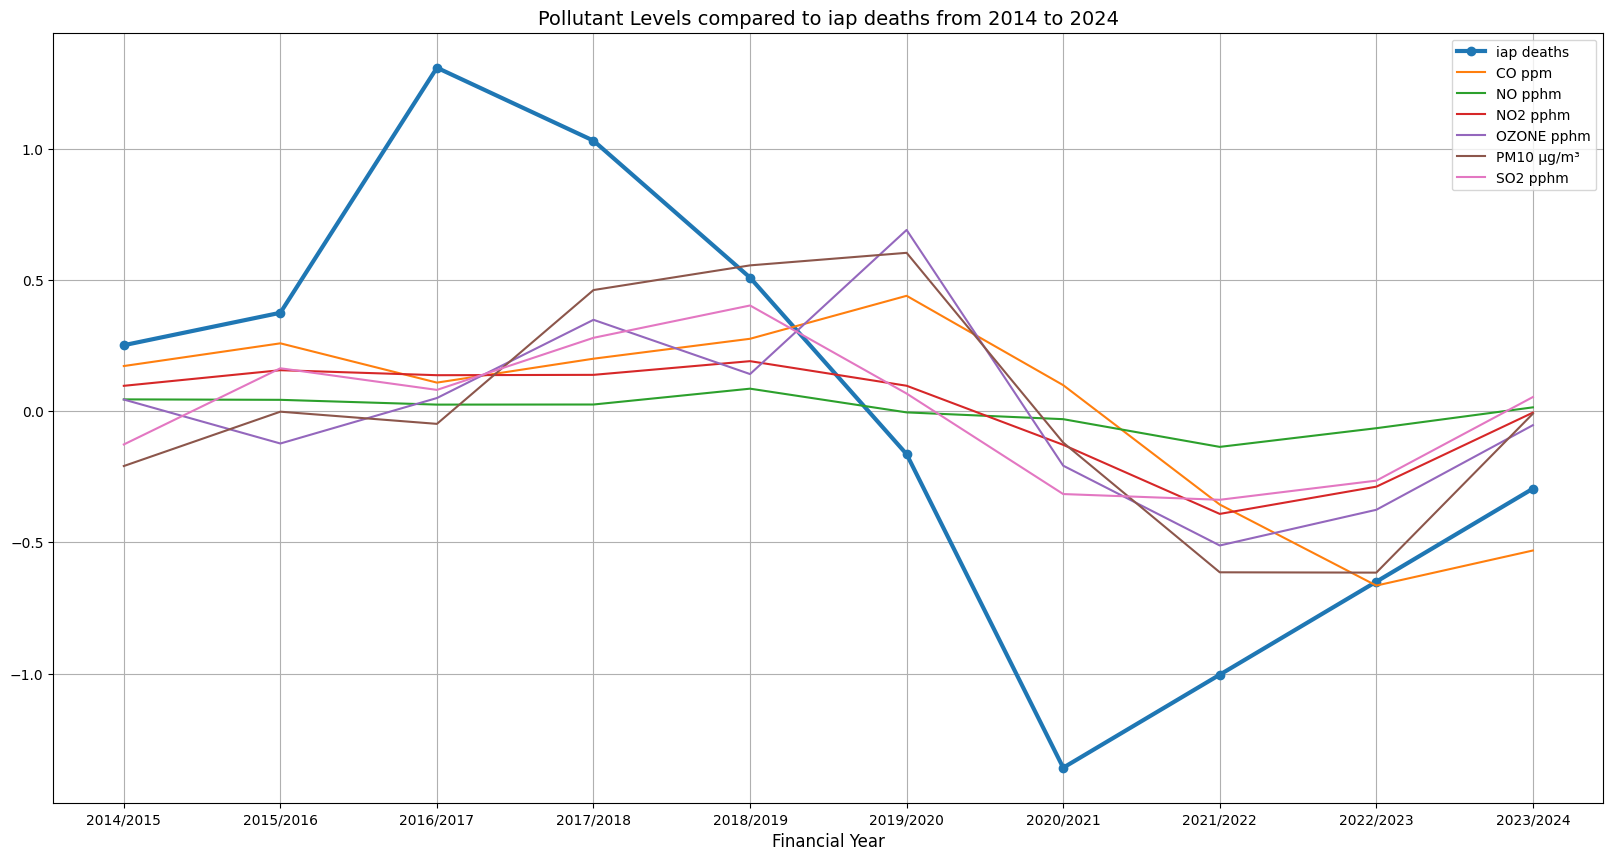

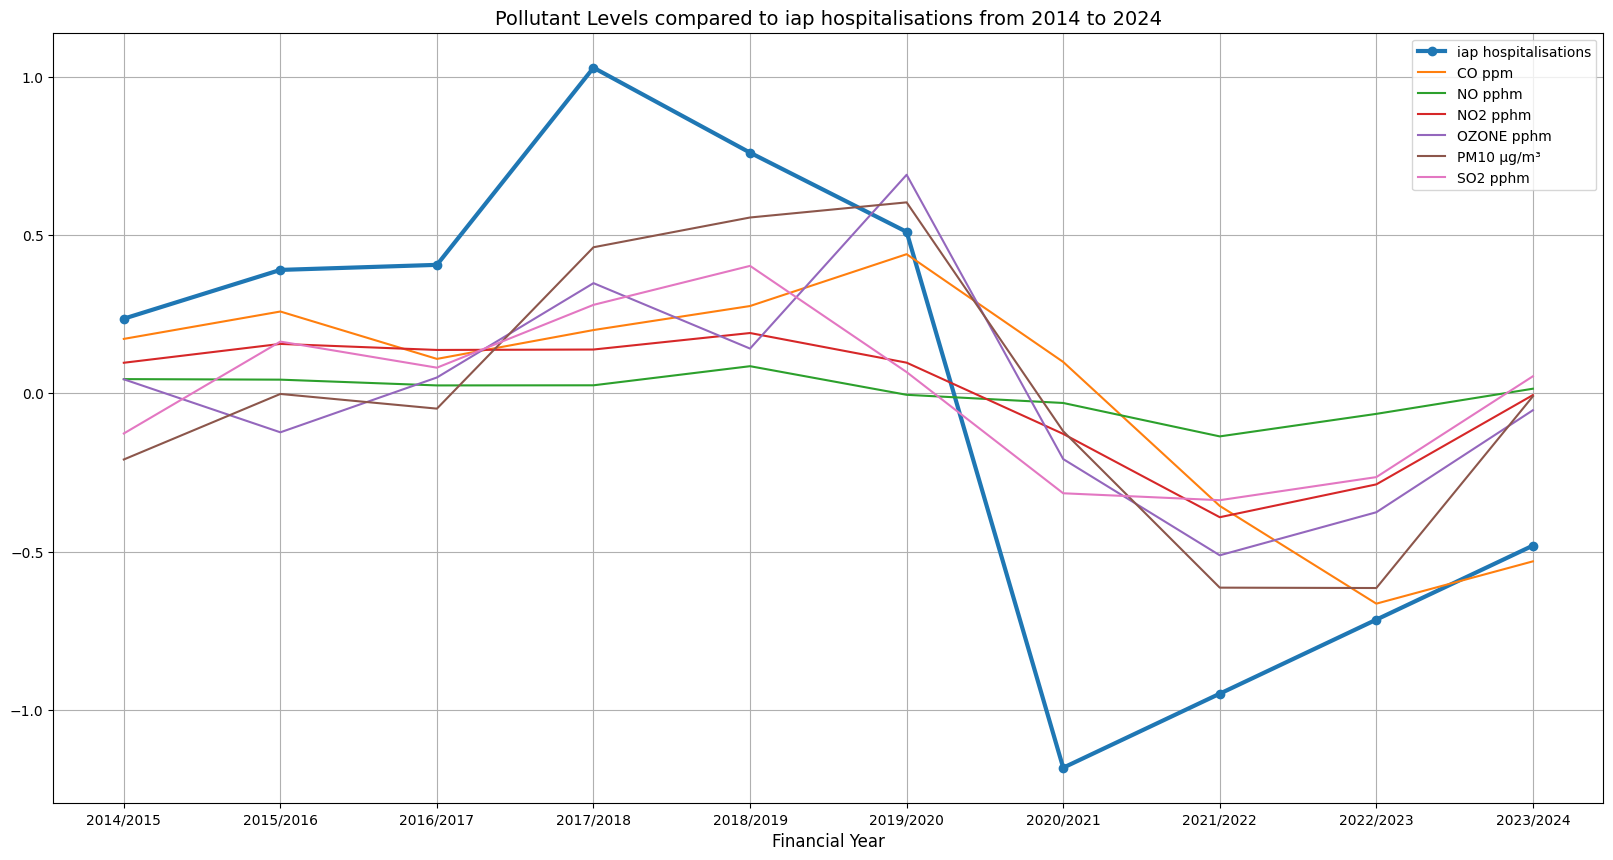

In [298]:
numerical_cols = df.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

yearly_trends = df.groupby('financial year').mean(numeric_only=True).reset_index()
print(df)

# Extract pollutant columns and columns after the pollutants

for i in health_stat_columns:
    plt.figure(figsize=(20, 10))
    plt.plot(yearly_trends['financial year'], yearly_trends[i], label=i, marker='o', linewidth=3)
    for j in column_list:
        plt.plot(yearly_trends['financial year'], yearly_trends[j], label=j)
    plt.title('Pollutant Levels compared to ' + i +' from 2014 to 2024', fontsize=14)
    plt.xlabel('Financial Year', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()



## Linear Regression Model for Predicting Illness Rates based on Pollutant Concentration

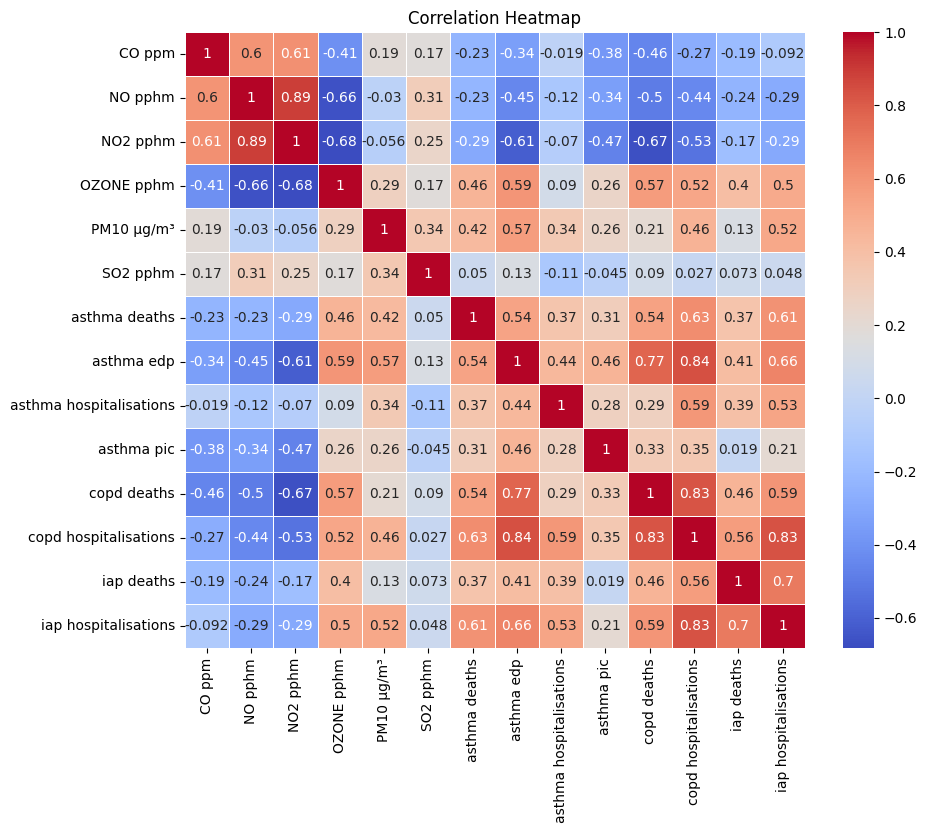

CO ppm


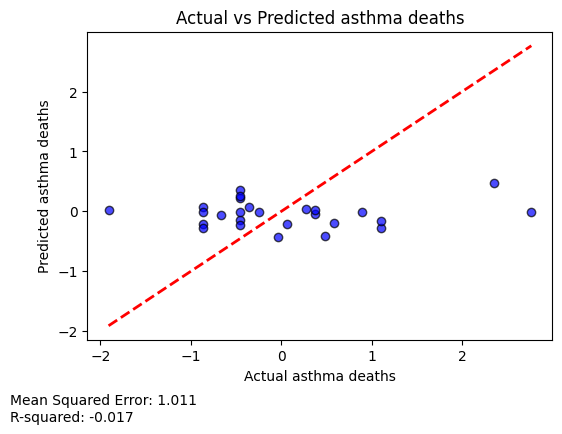

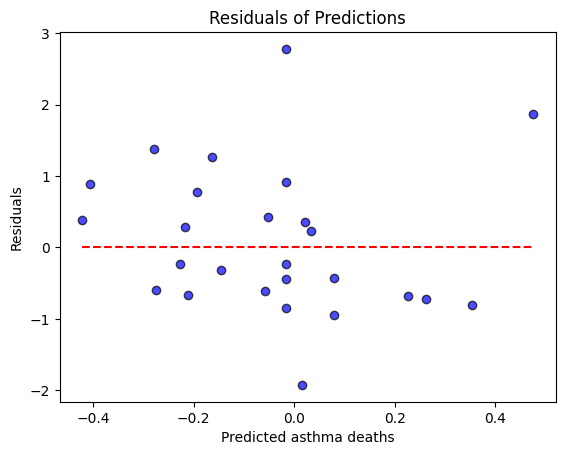

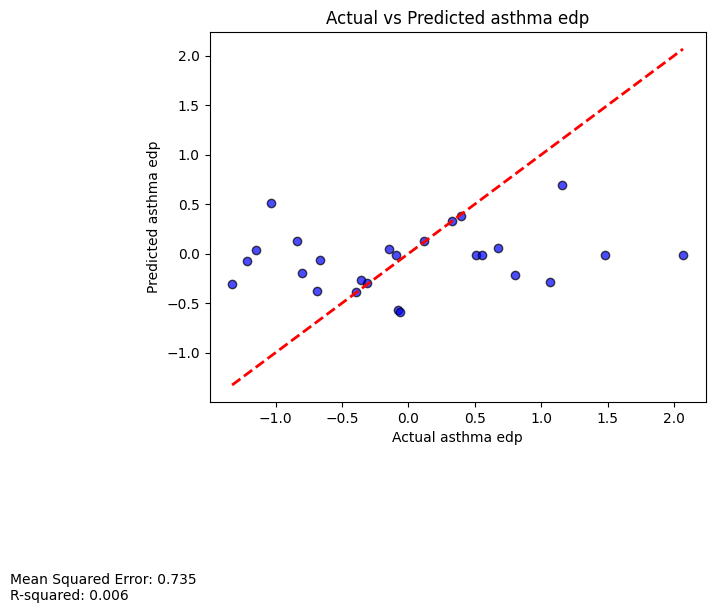

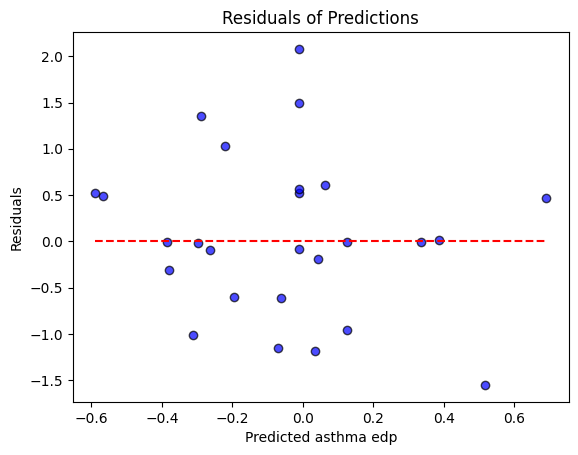

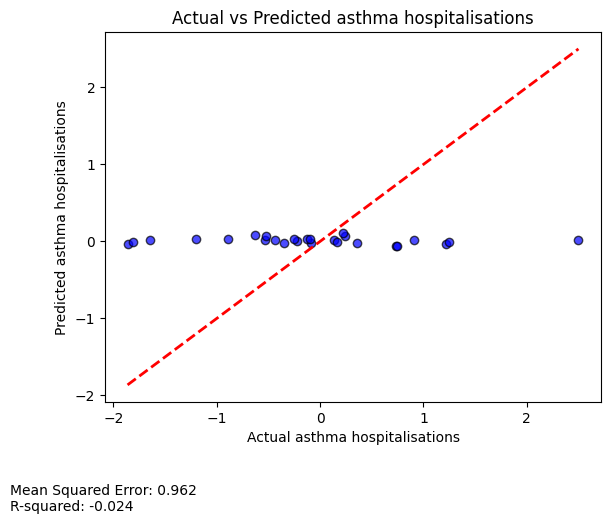

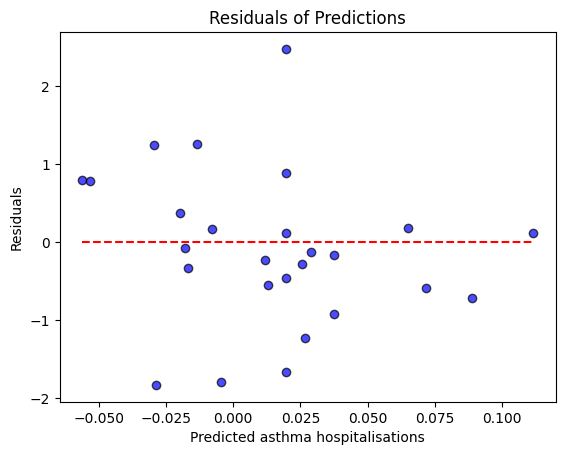

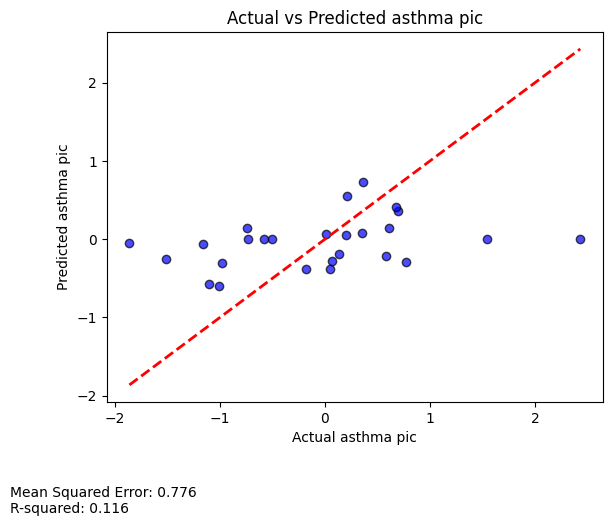

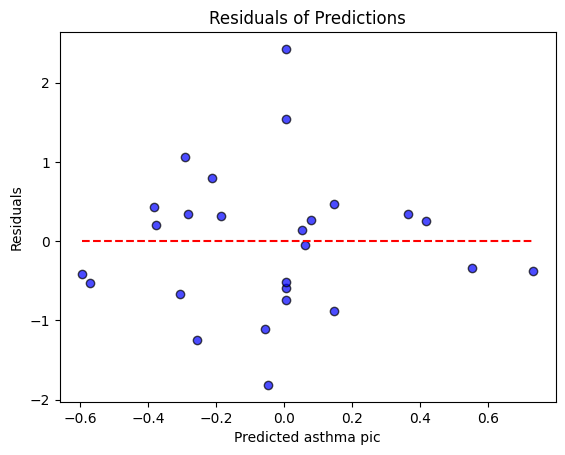

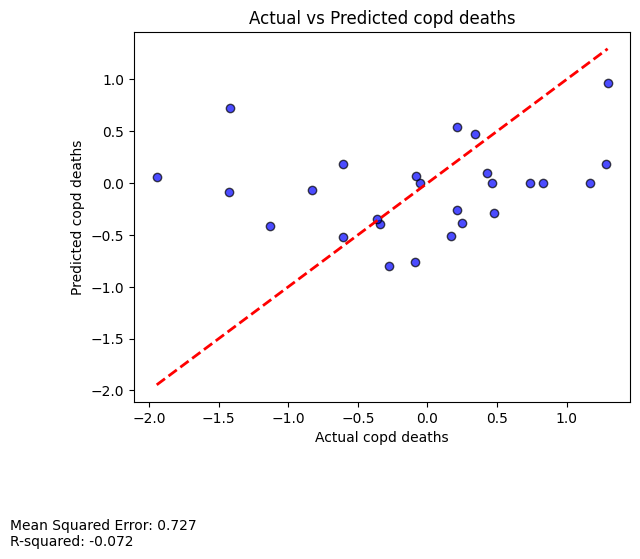

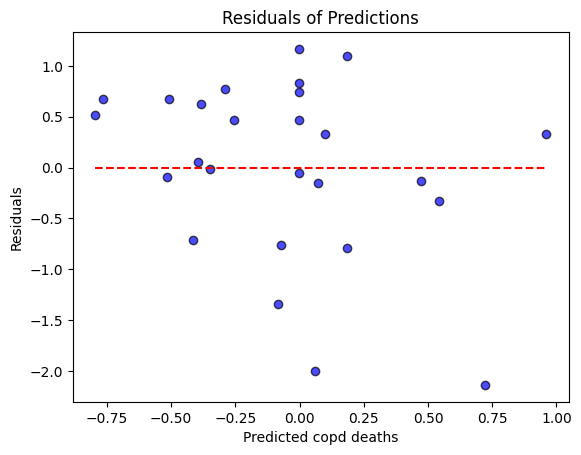

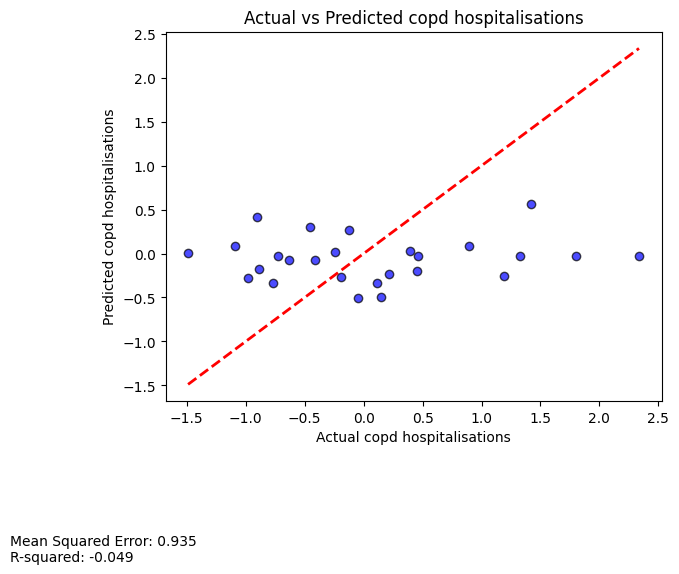

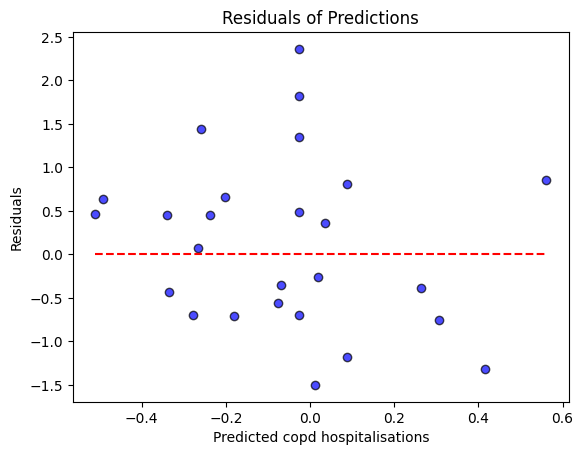

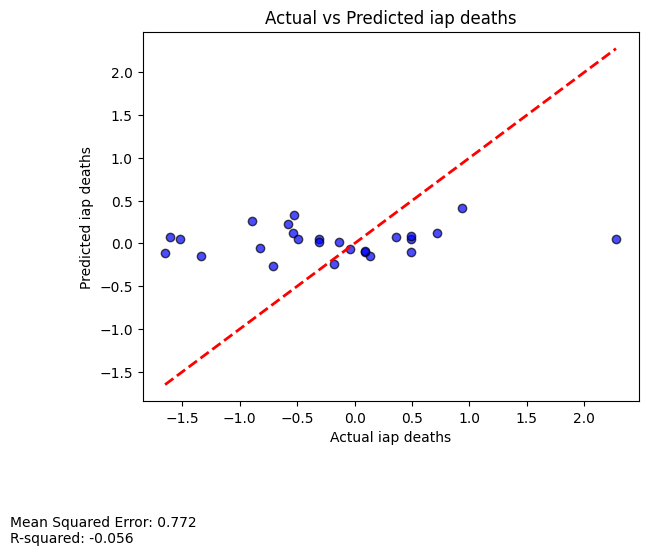

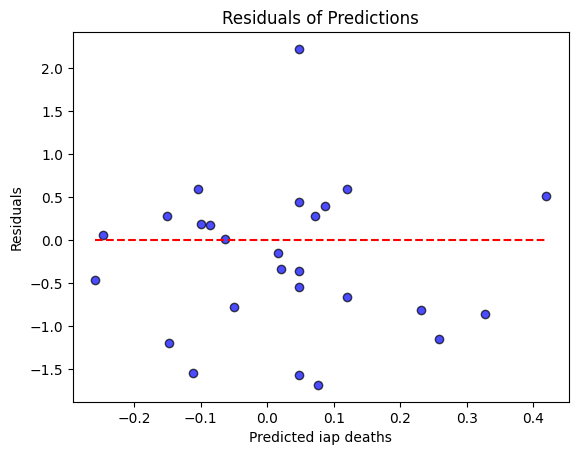

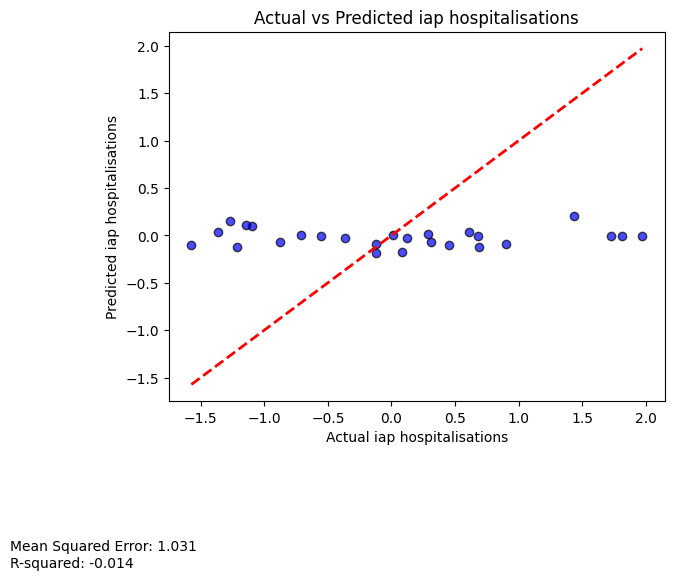

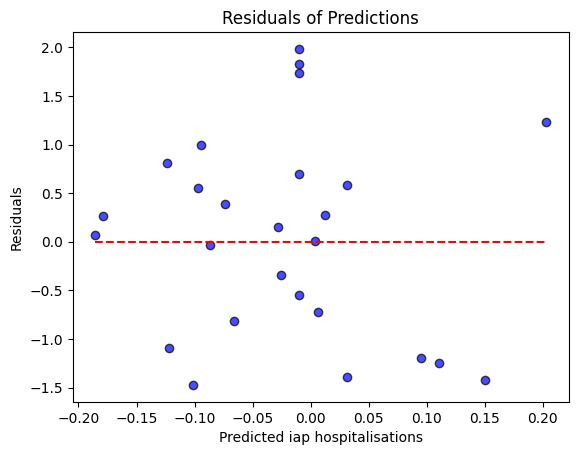

NO pphm


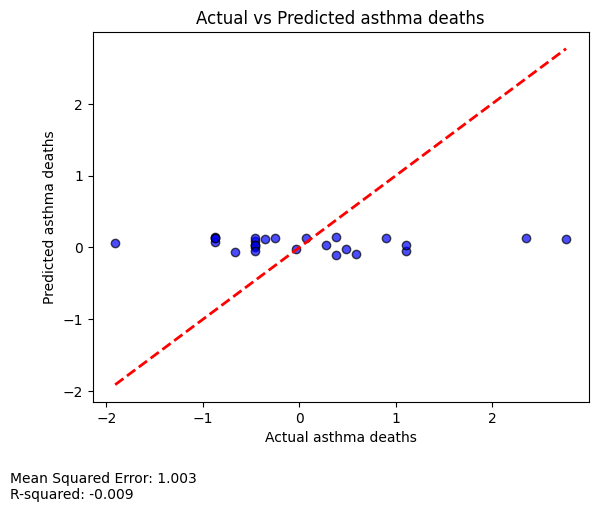

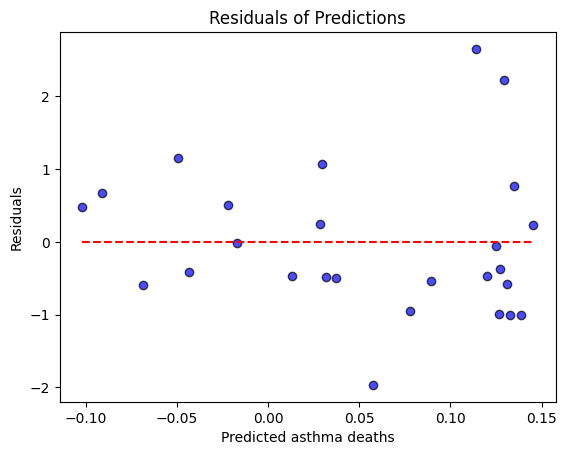

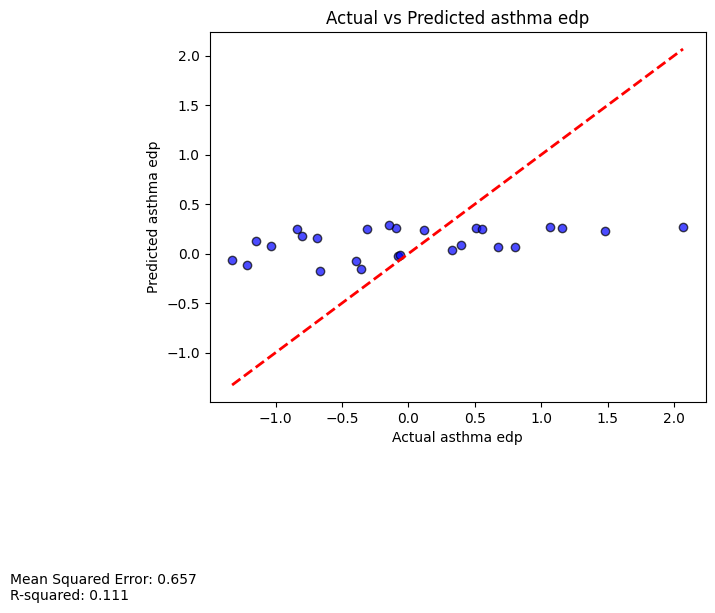

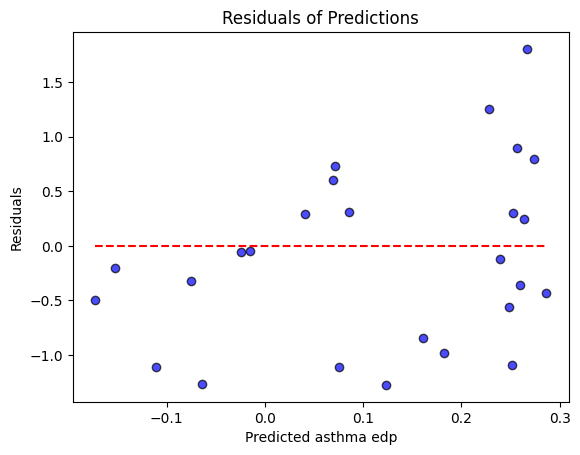

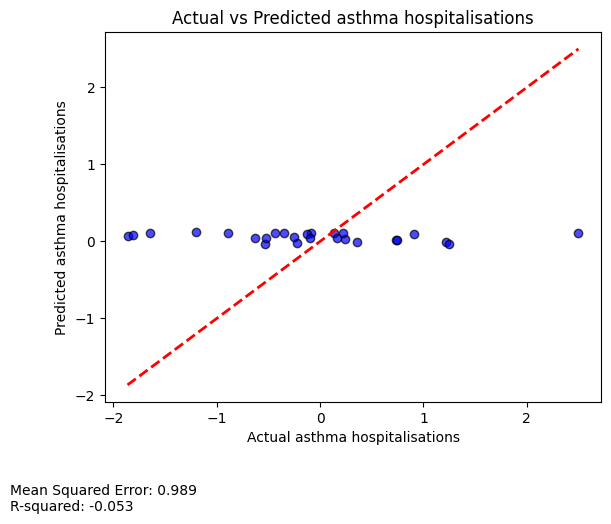

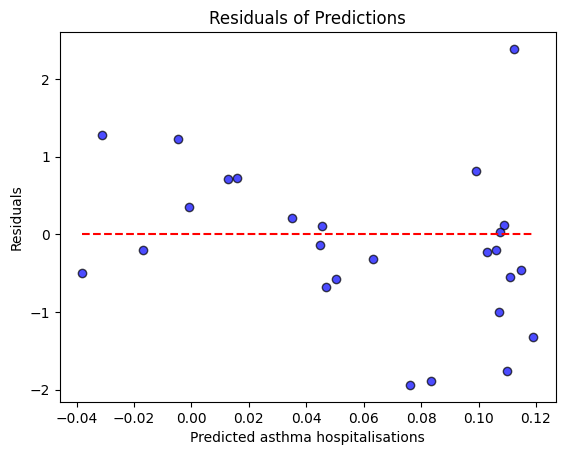

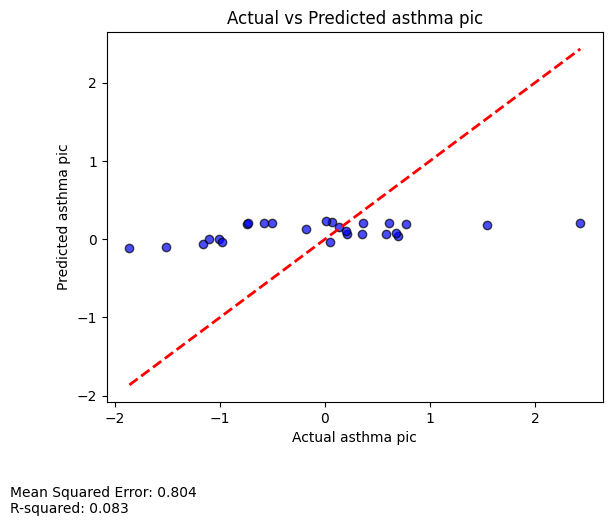

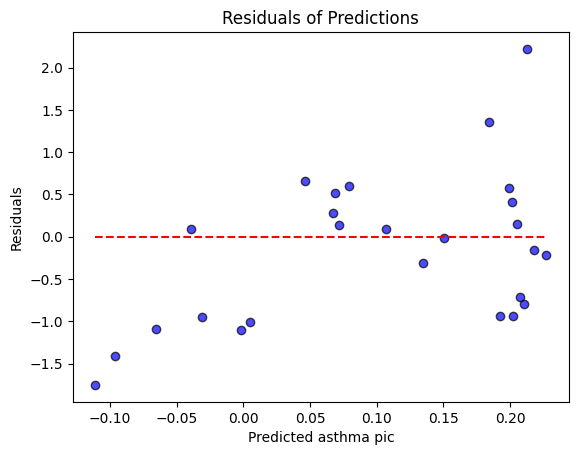

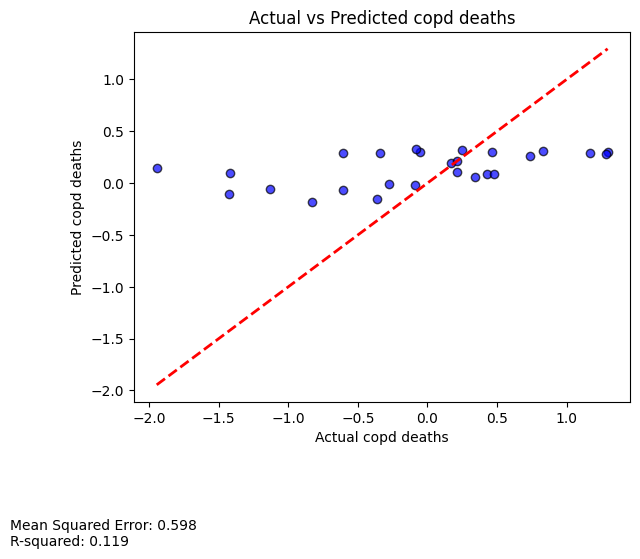

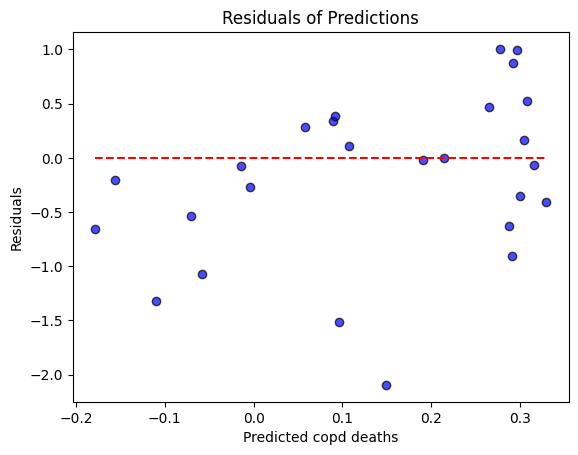

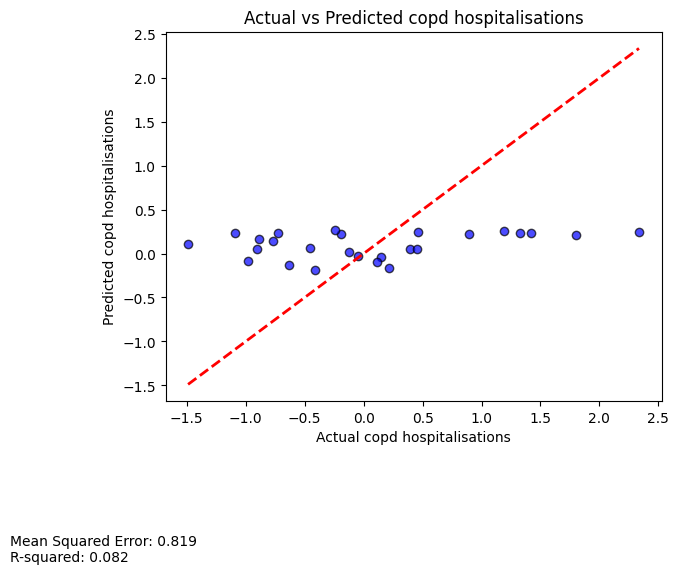

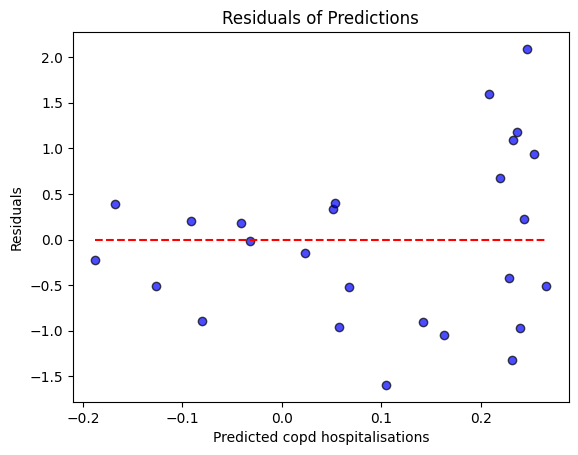

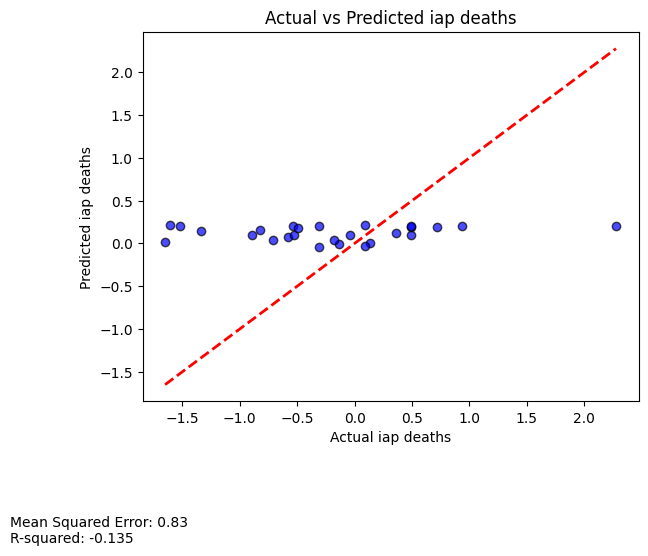

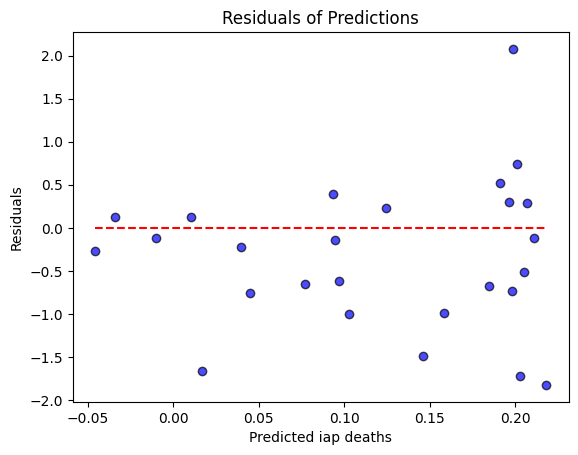

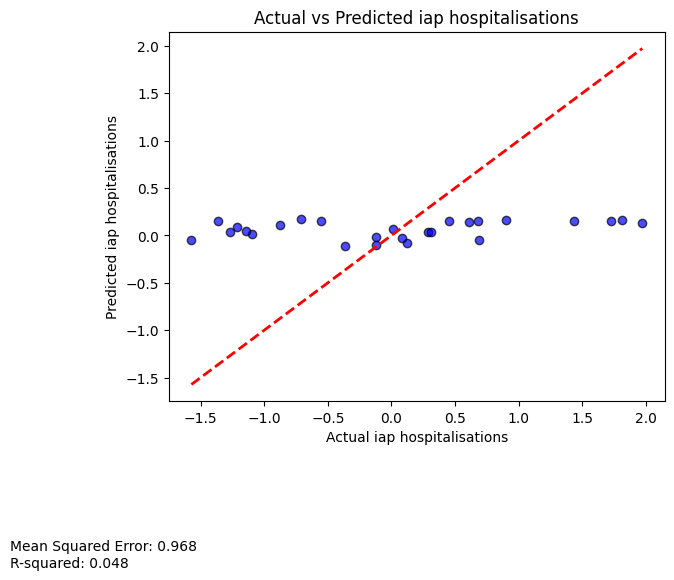

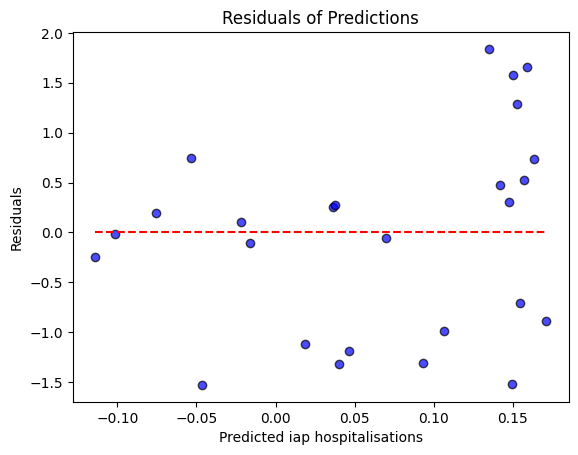

NO2 pphm


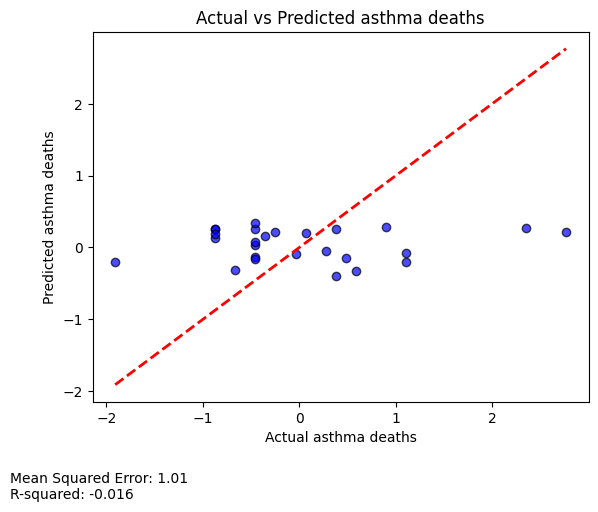

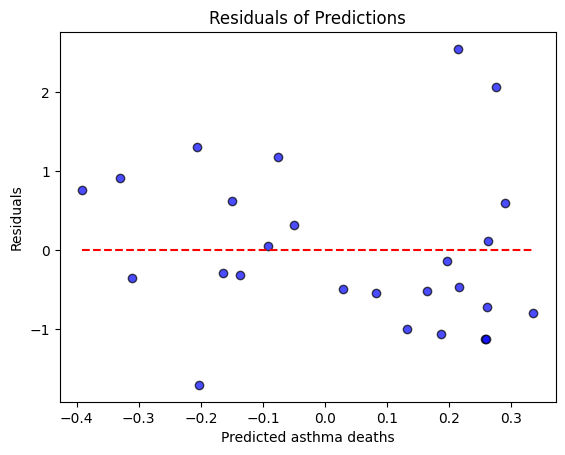

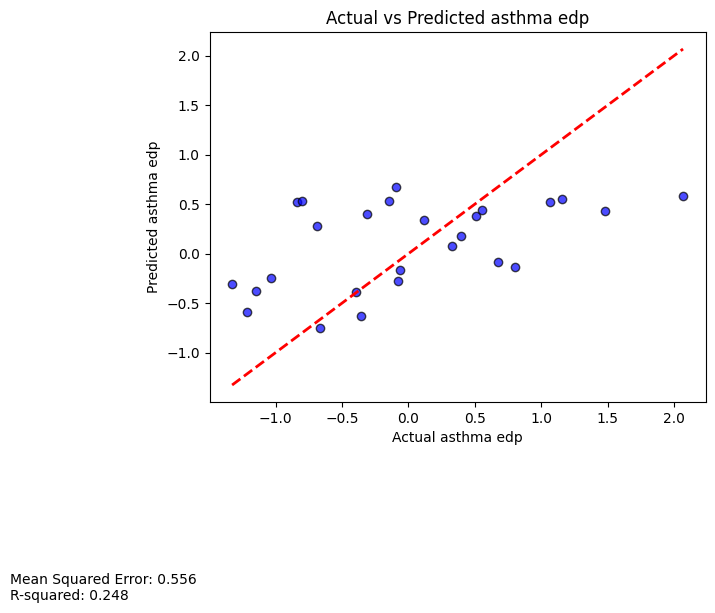

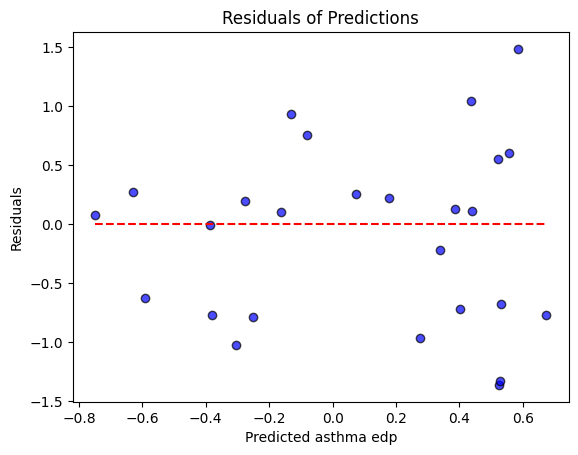

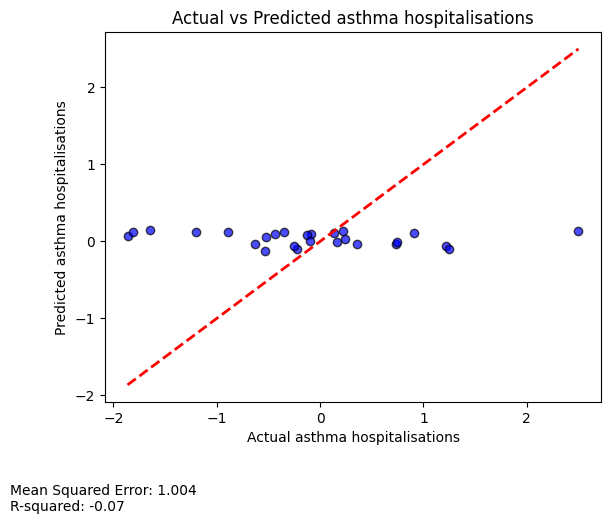

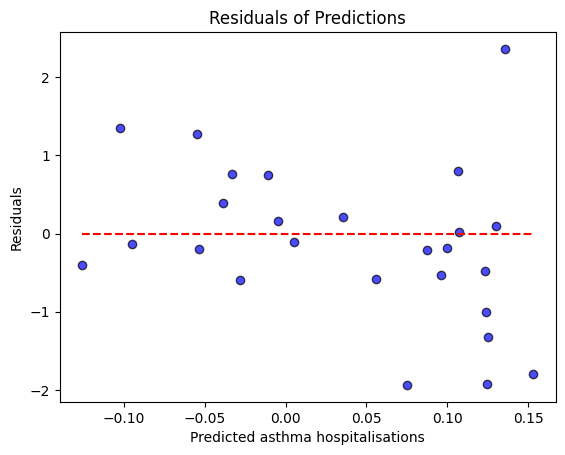

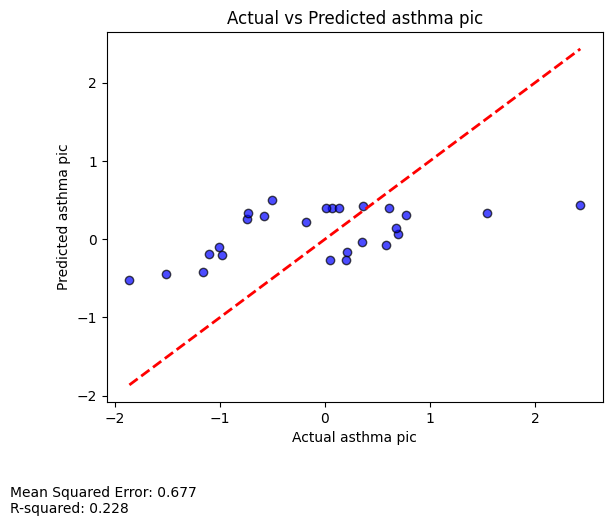

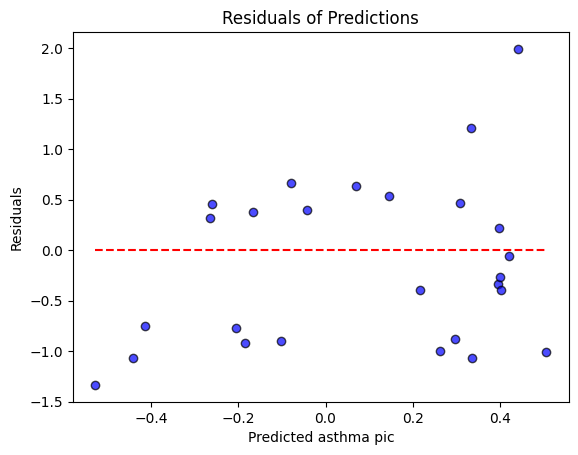

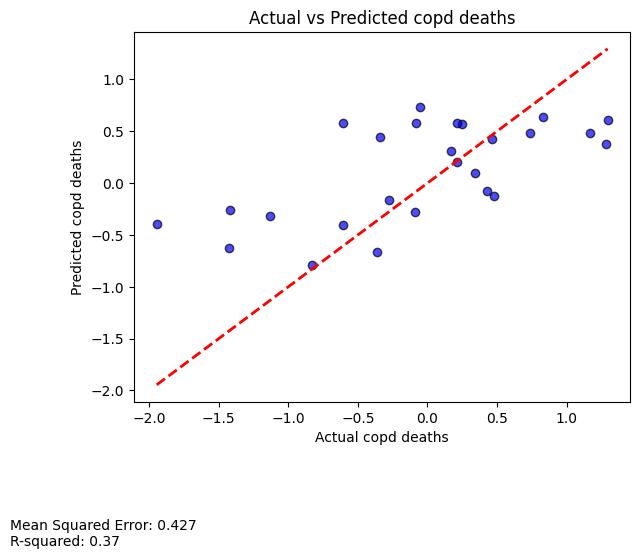

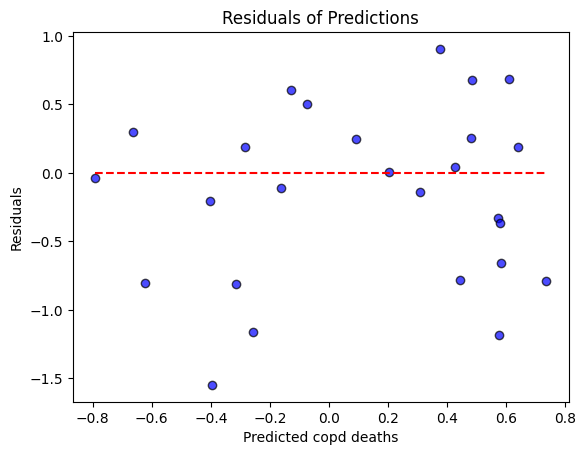

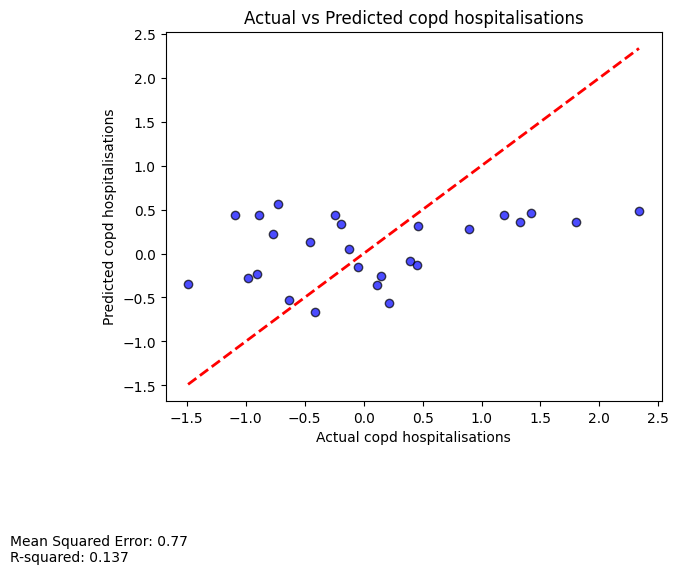

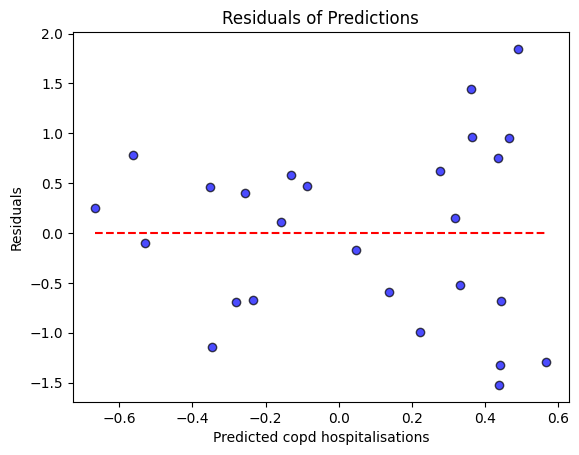

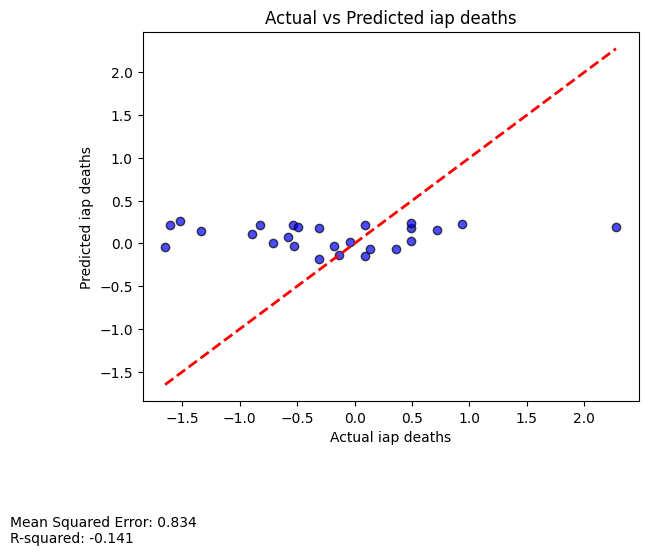

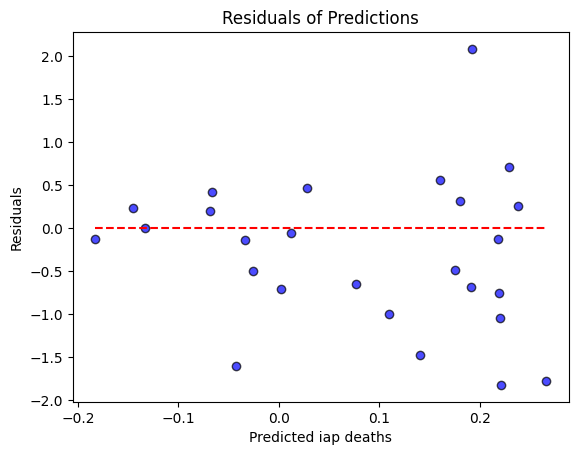

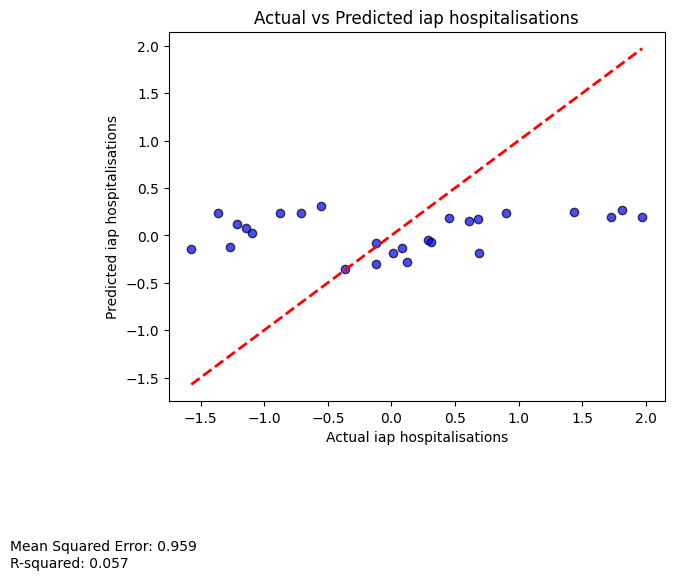

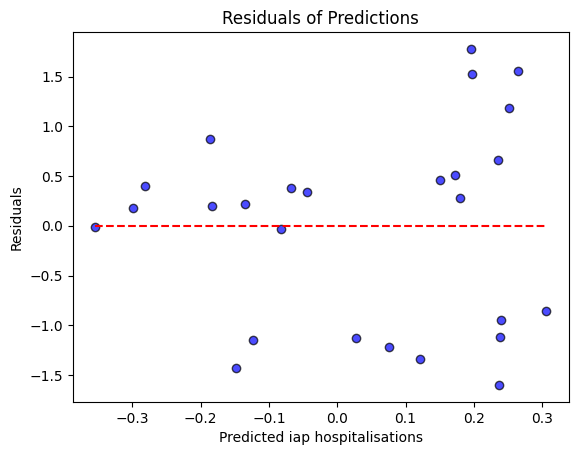

OZONE pphm


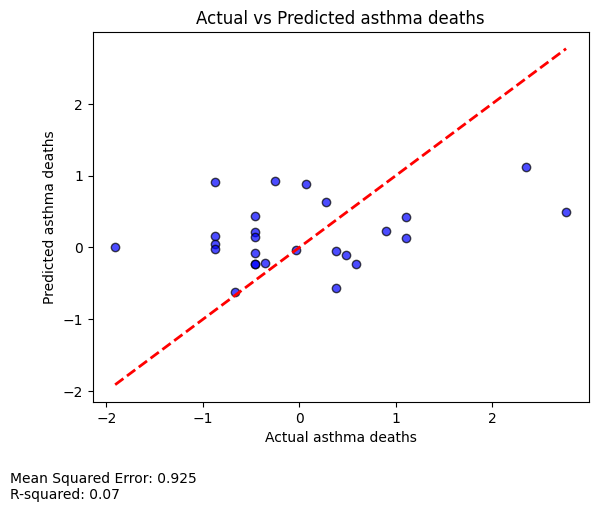

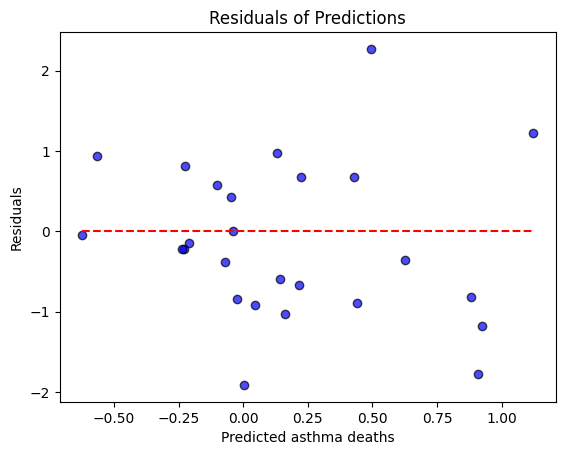

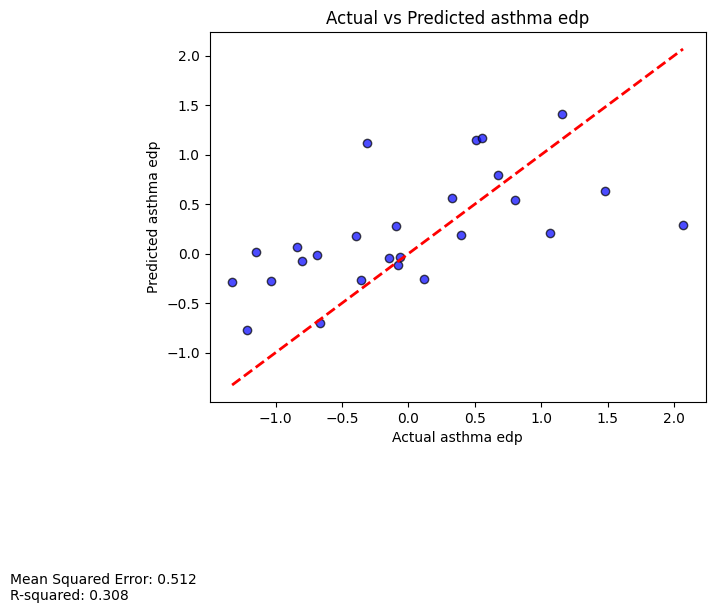

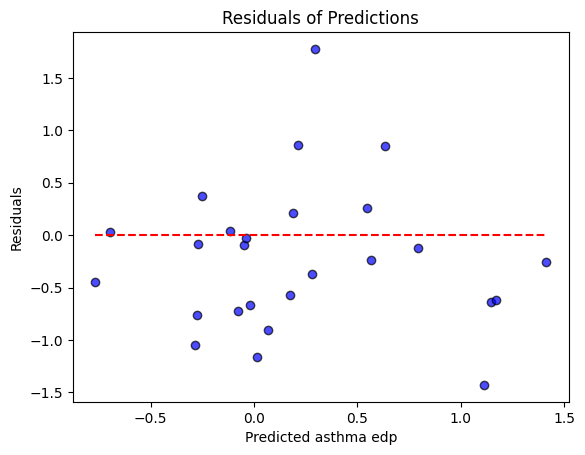

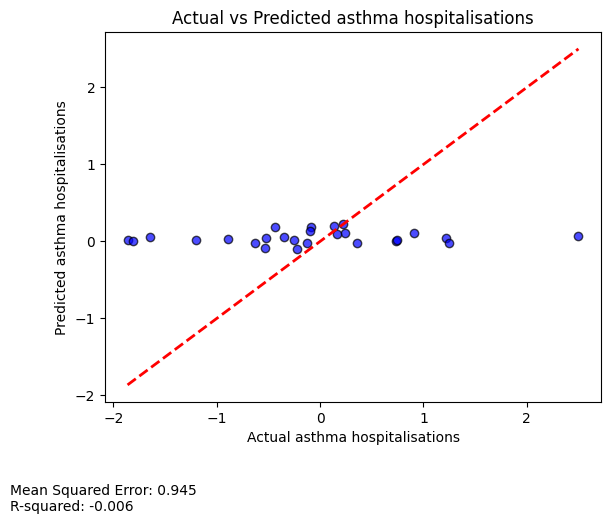

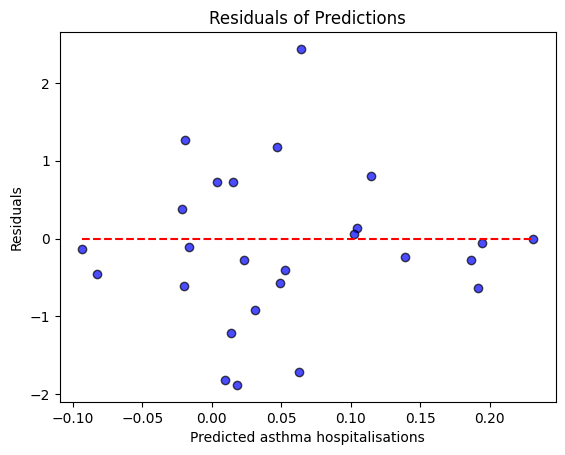

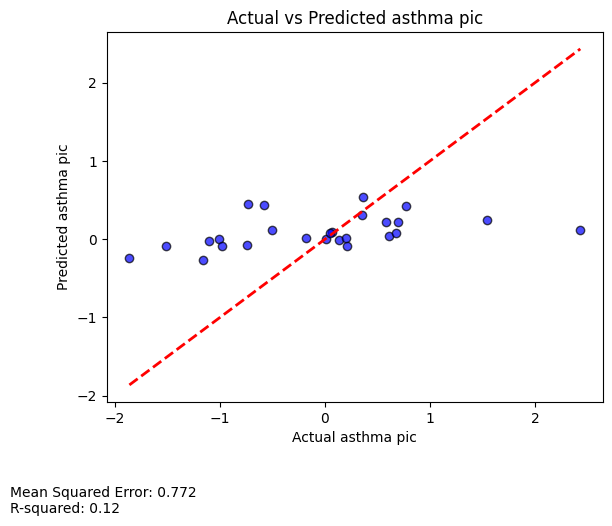

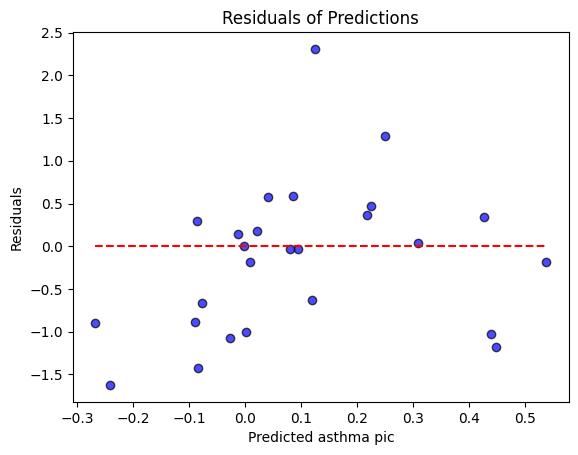

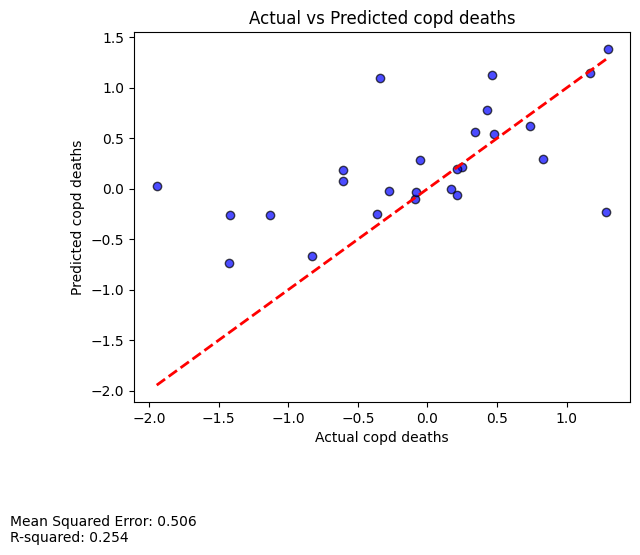

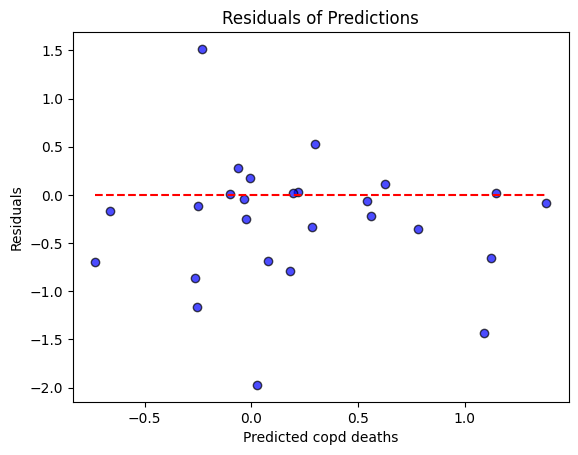

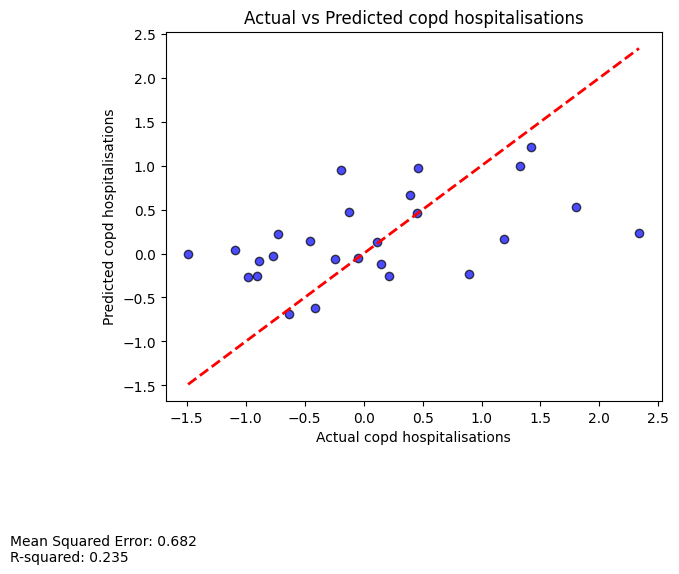

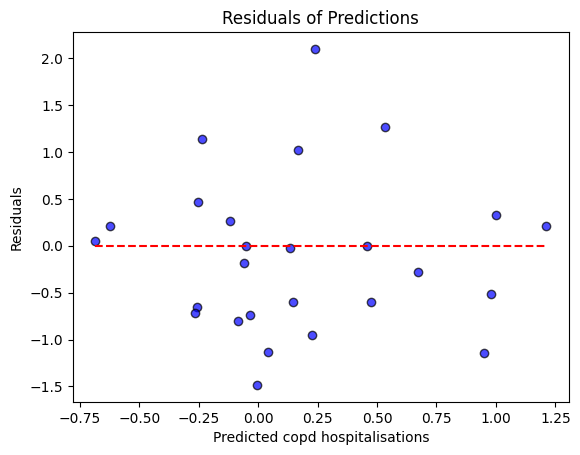

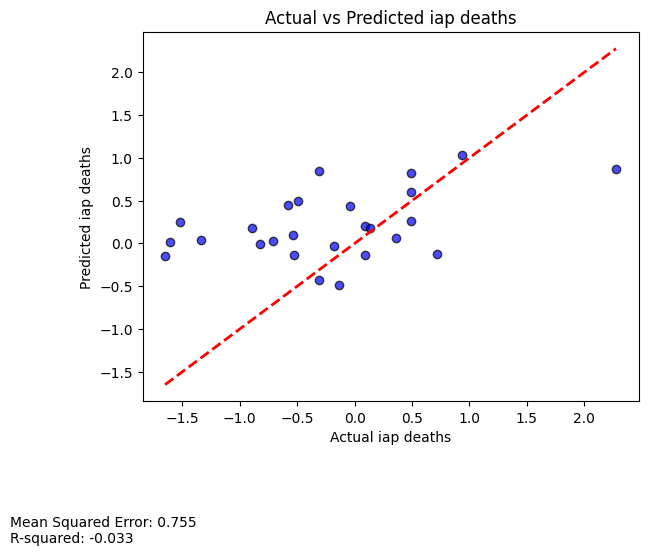

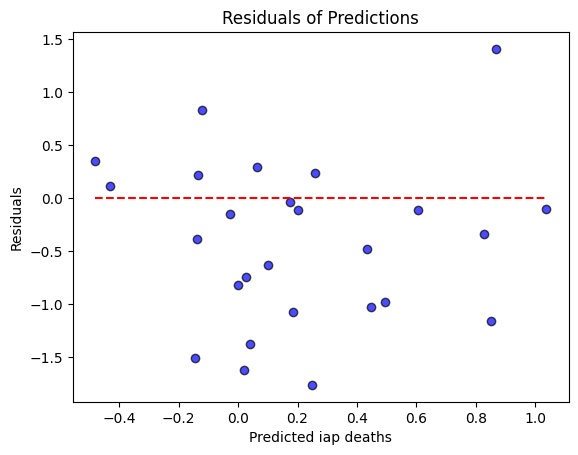

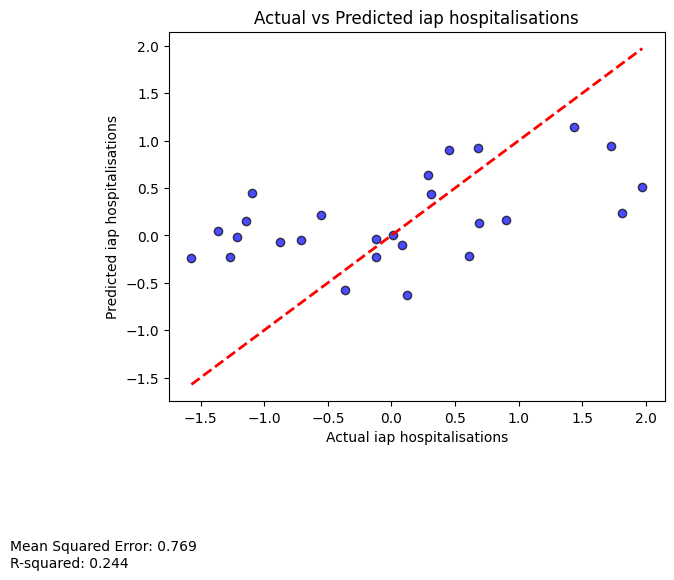

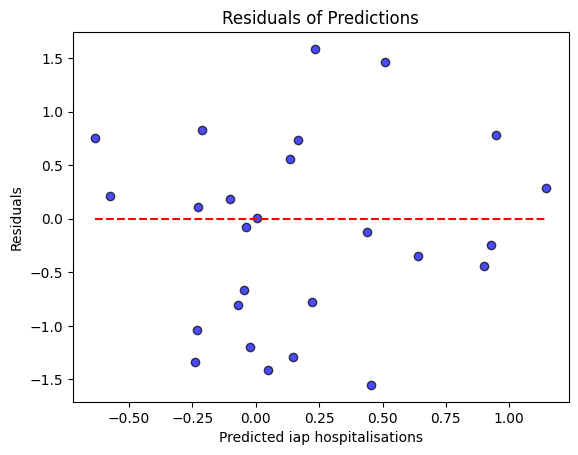

PM10 µg/m³


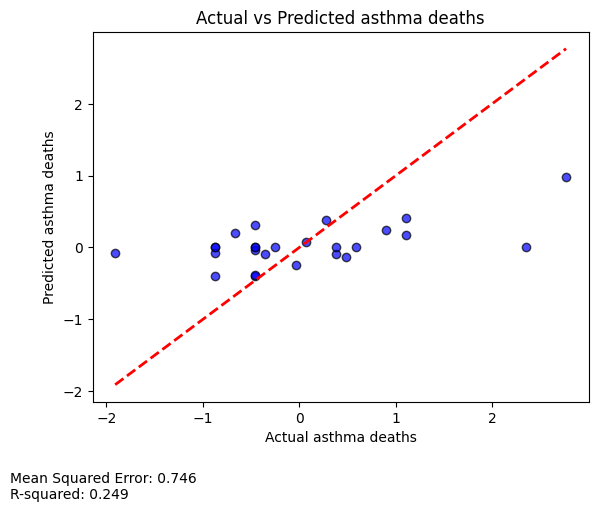

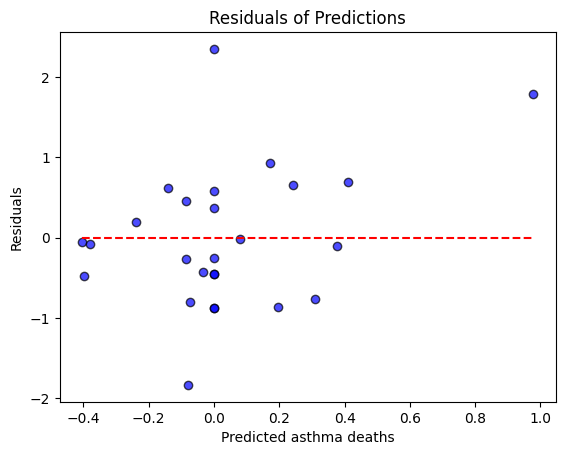

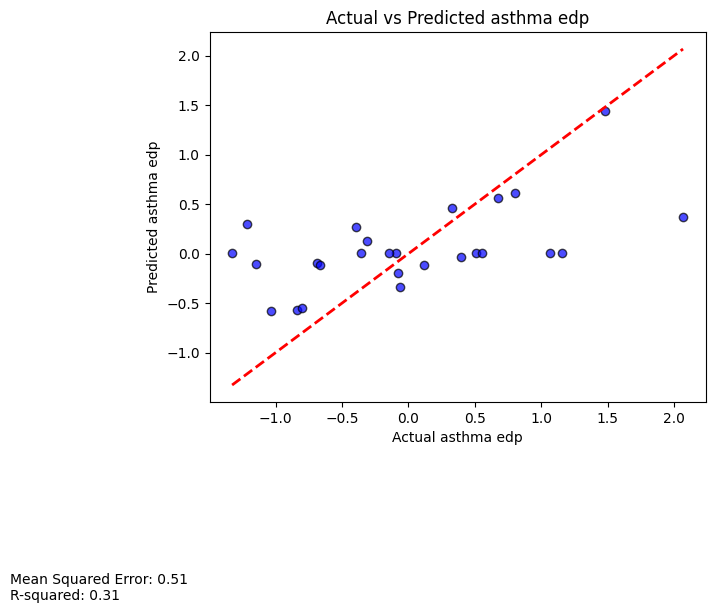

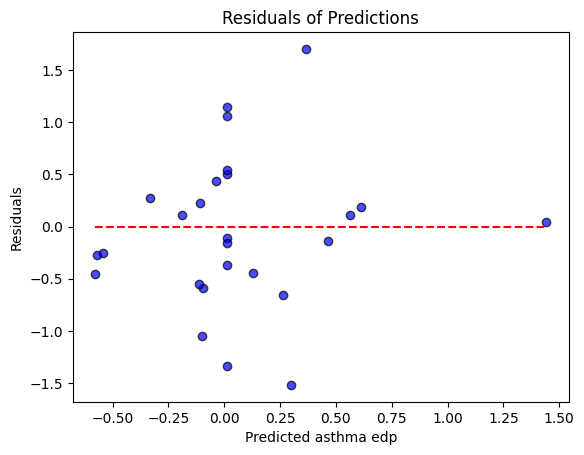

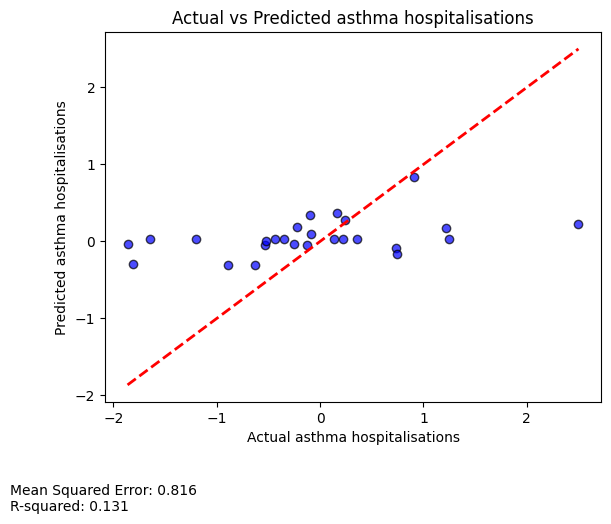

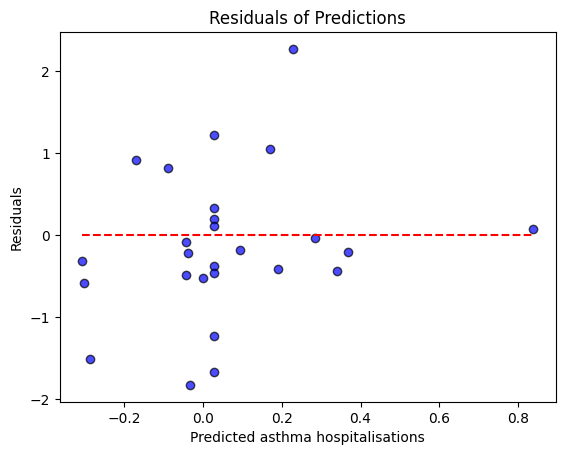

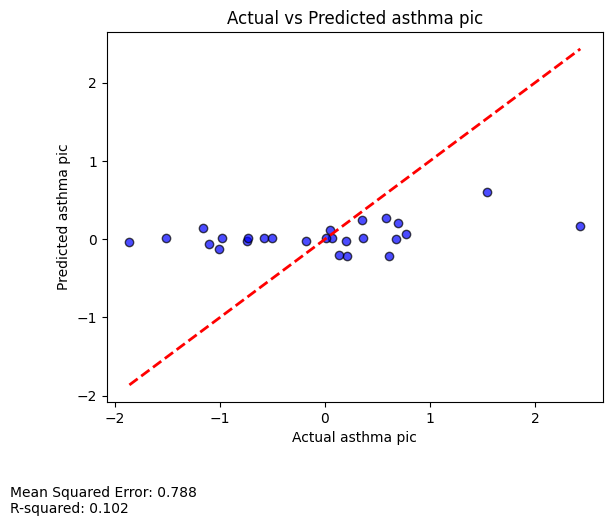

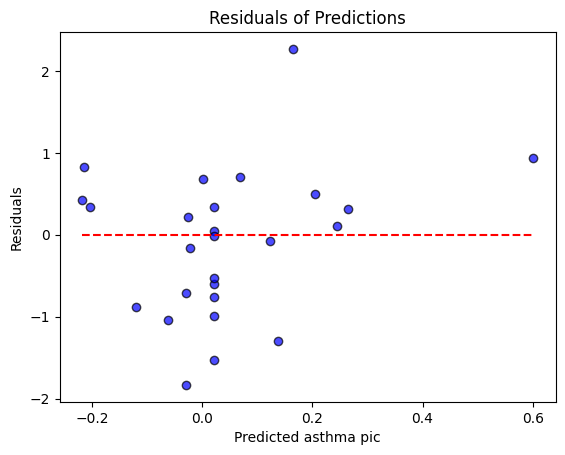

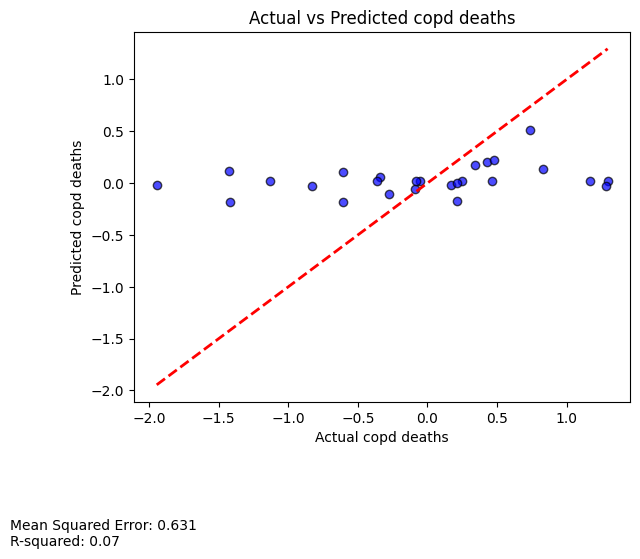

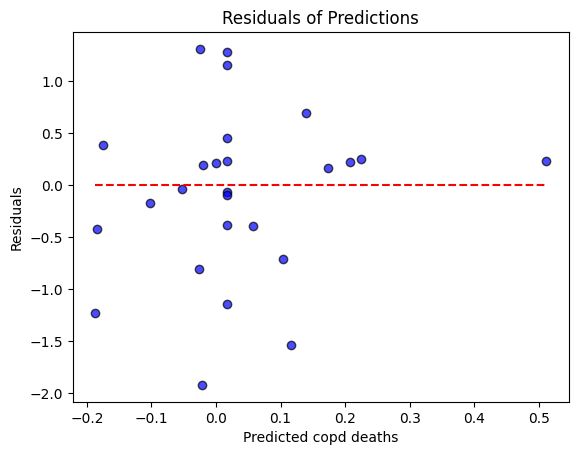

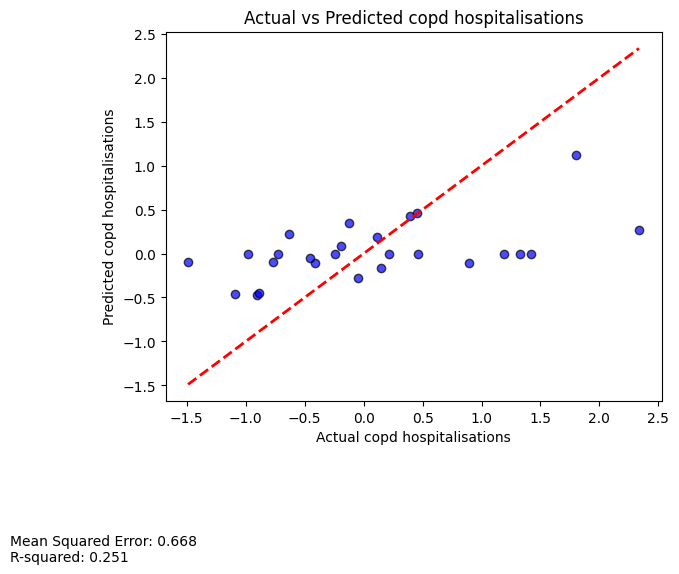

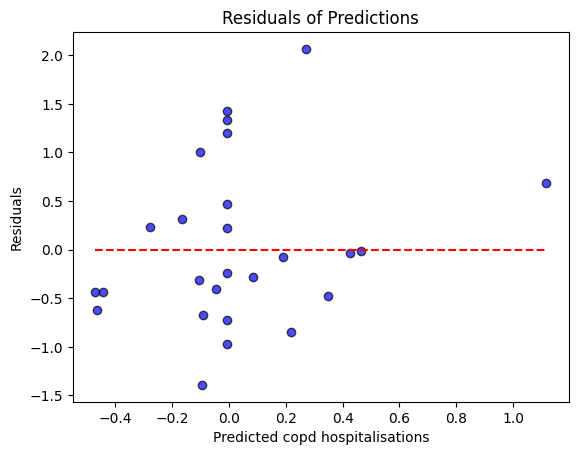

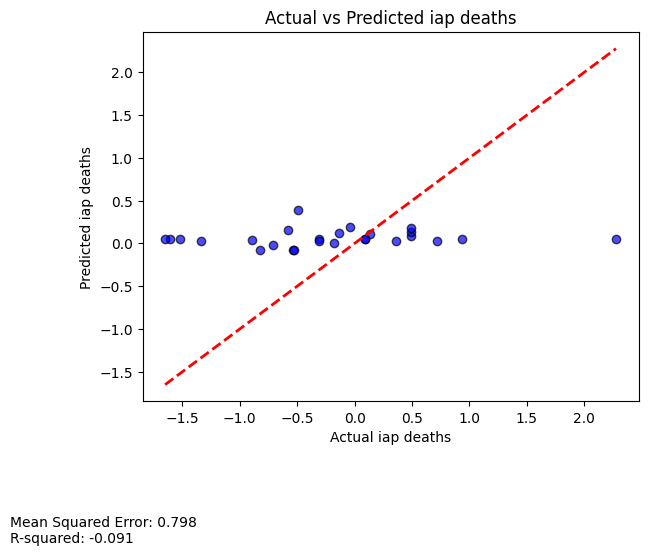

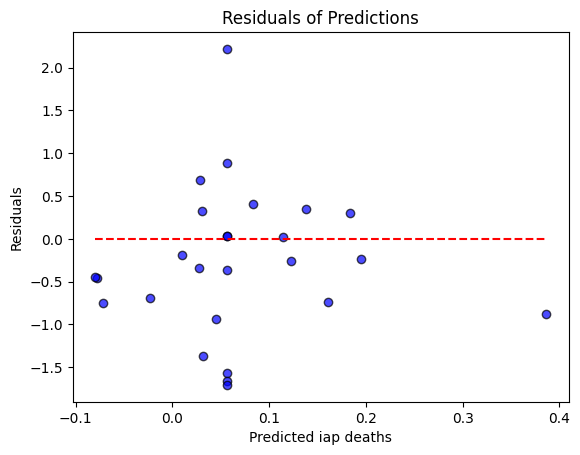

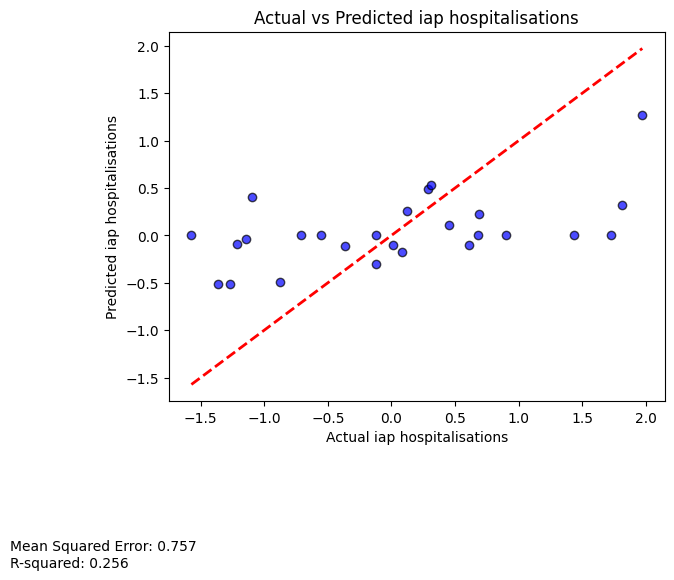

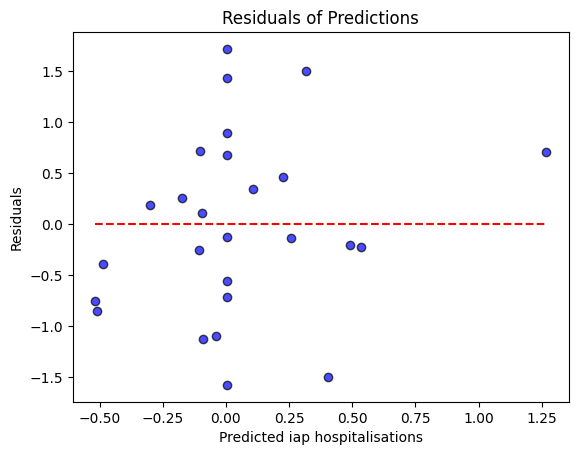

SO2 pphm


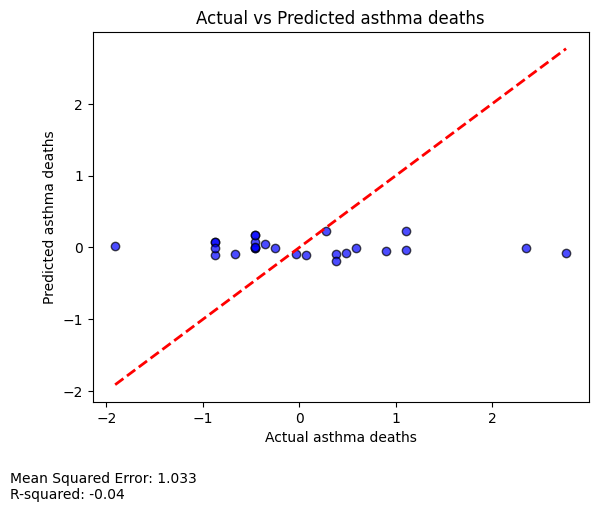

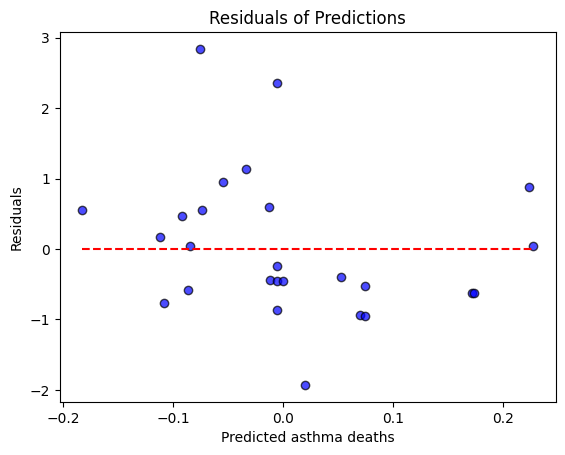

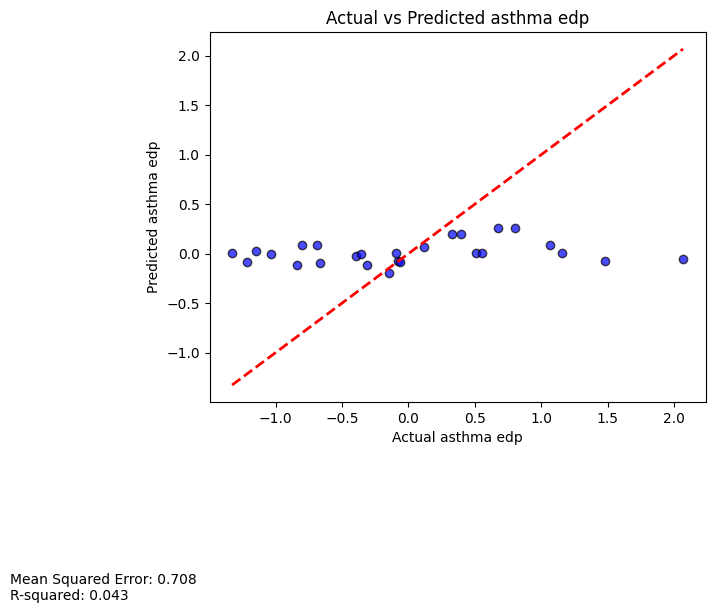

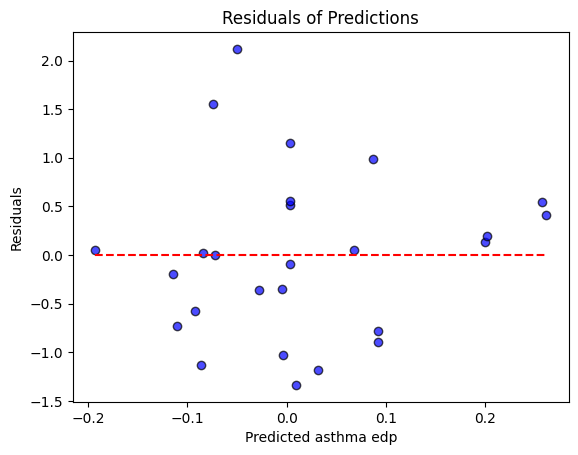

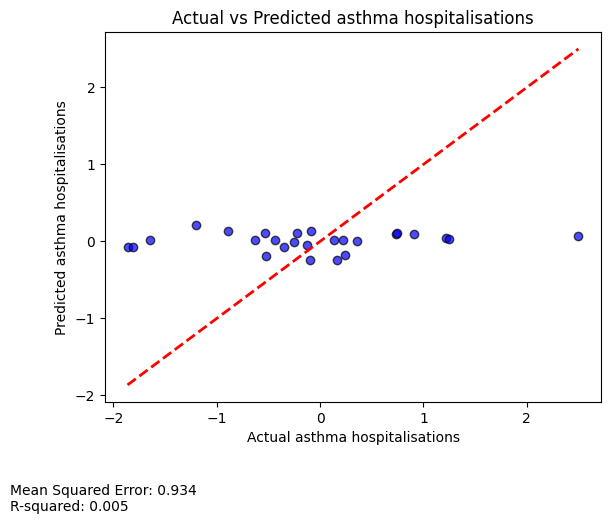

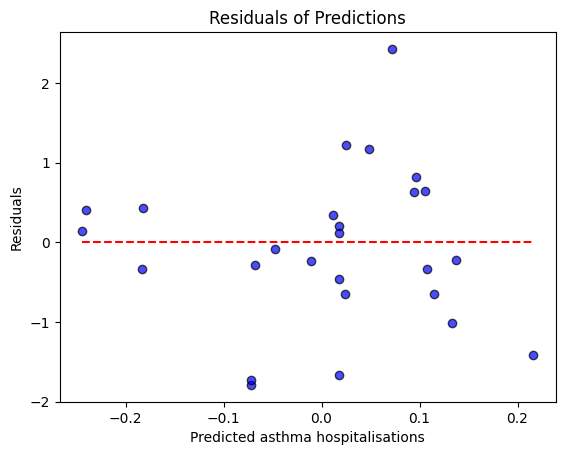

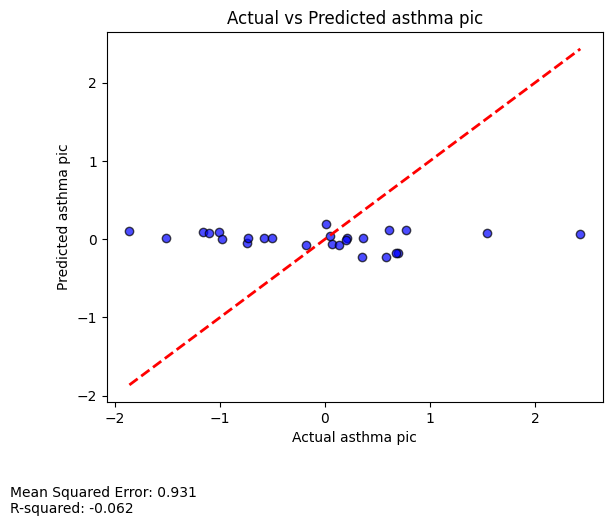

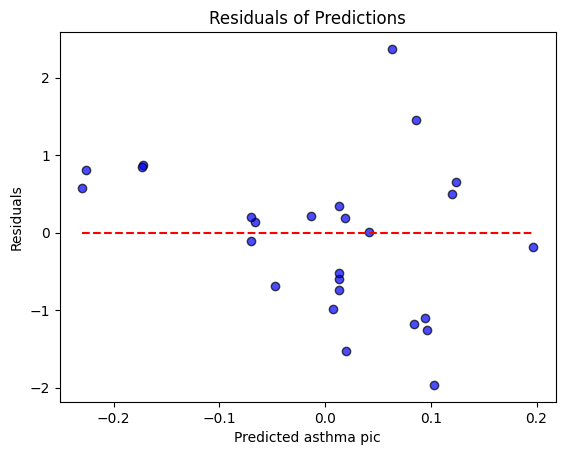

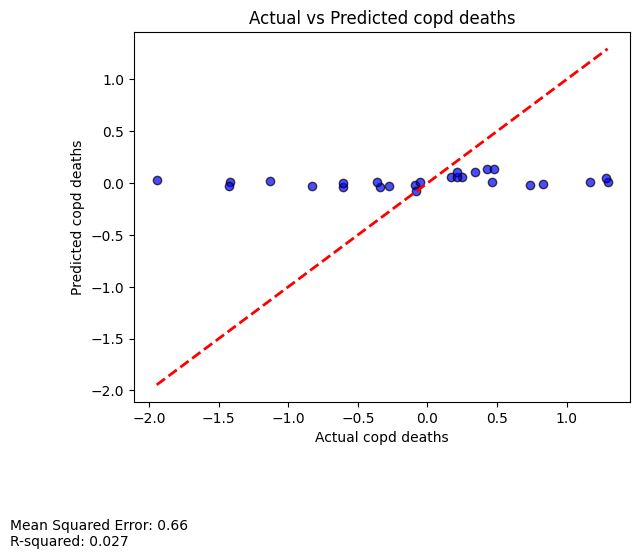

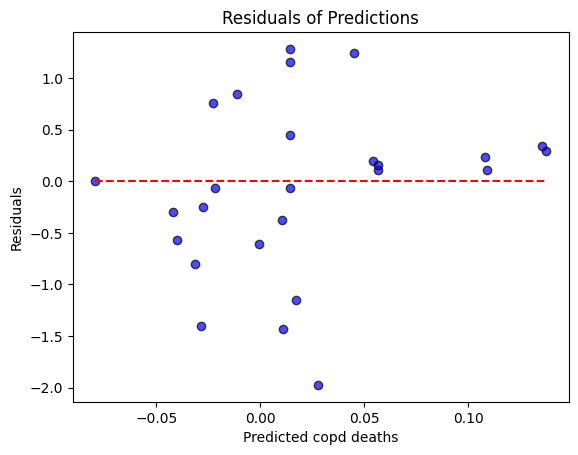

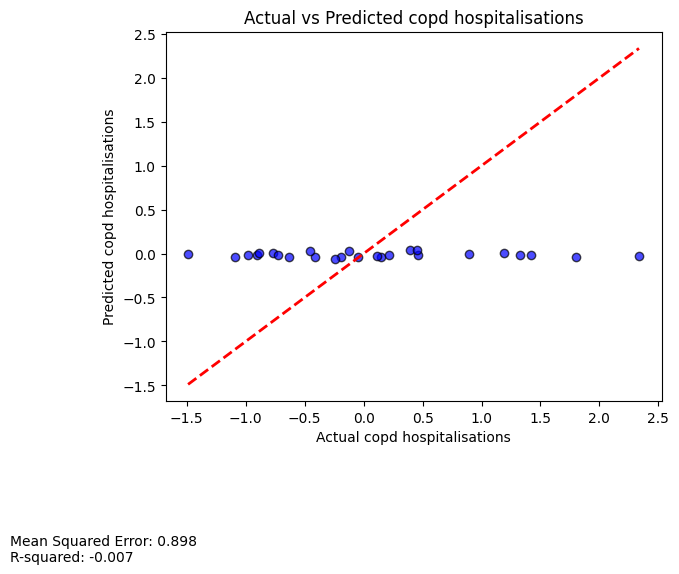

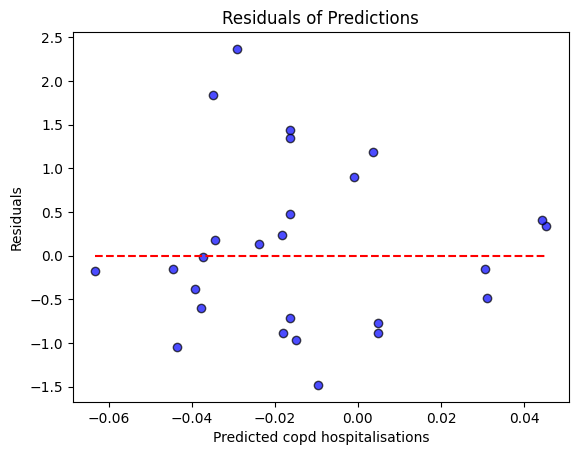

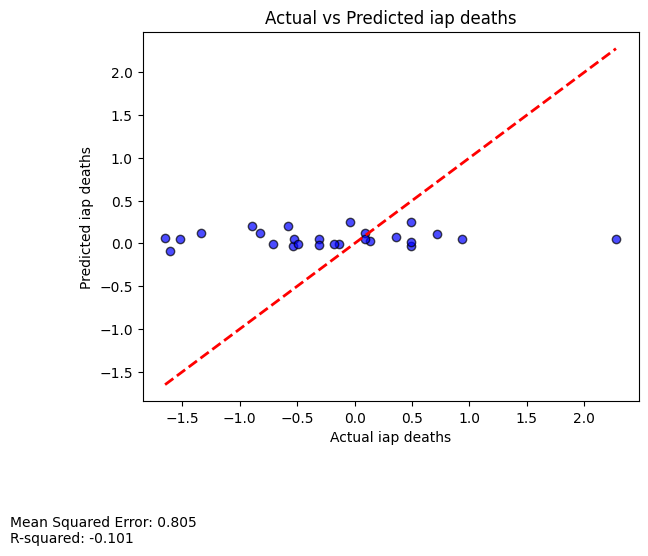

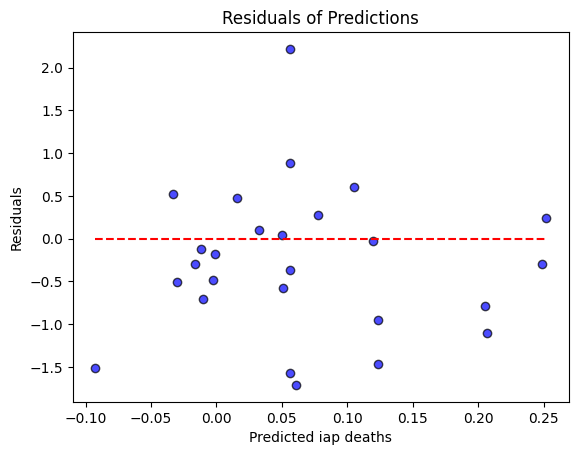

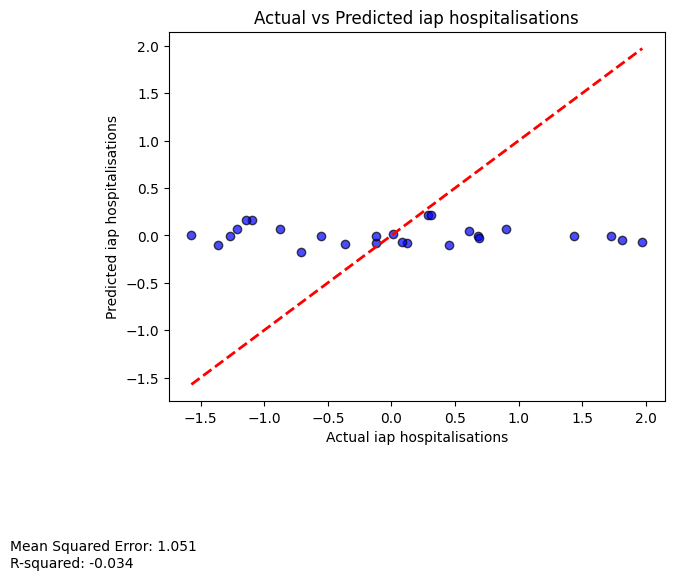

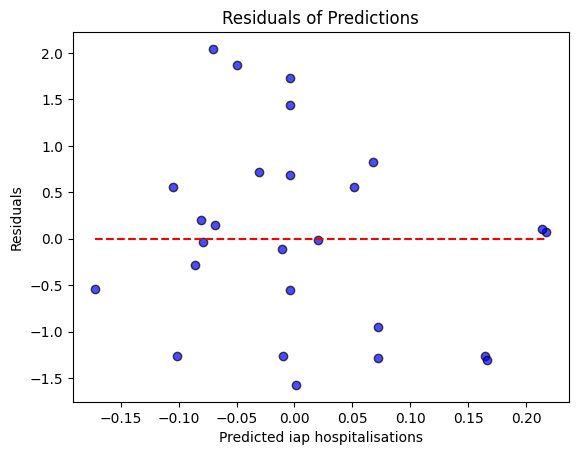

In [383]:

df = df.drop(['financial year', 'lhd'], axis=1)
numerical_cols = df.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(6, 4))

for i in pollutant_columns:
    print(i)
    for j in health_stat_columns:
        X = df[[i]]
        y = df[[j]]
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train a linear regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Perform evaluations on model predictions
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Plot actual vs. predicted asthma hospitalizations
        plt.scatter(y_test, y_pred, color='blue', edgecolors='k', alpha=0.7)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line for perfect predictions
        plt.xlabel('Actual ' + j)
        plt.ylabel('Predicted ' + j)
        plt.title('Actual vs Predicted ' + j)
        plt.text(-3, -3.5, (f'Mean Squared Error: {round(mse,3)}\n' + f'R-squared: {round(r2,3)}'))
        plt.show()

        # Calculate residuals
        residuals = y_test - y_pred

        # Plot residuals
        plt.scatter(y_pred, residuals, color='blue', edgecolors='k', alpha=0.7)
        plt.hlines(0, y_pred.min(), y_pred.max(), colors='r', linestyles='dashed')
        plt.xlabel('Predicted ' + j)
        plt.ylabel('Residuals')
        plt.title('Residuals of Predictions')
        plt.show()

## ARMA Time Series Forecasting for Predicting Pollutant Concentration and Asthma ED Presentations based on Historical Levels

- Followed this tutorial for ARIMA: https://www.geeksforgeeks.org/arma-time-series-model/
- Followed this for determining P and Q values form ARIMA: https://www.baeldung.com/cs/acf-pacf-plots-arma-modeling

    year-month    CO ppm   NO pphm  NO2 pphm  OZONE pphm  PM10 µg/m³  \
0   2014-07-01  0.149718  0.881262  0.787044    1.638223   16.071168   
1   2014-08-01  0.148803  0.662244  0.721435    1.884988   16.421492   
2   2014-09-01  0.120137  0.466746  0.636459    2.057258   15.690663   
3   2014-10-01  0.146763  0.384355  0.558555    2.380655   19.603422   
4   2014-11-01  0.135941  0.332400  0.491272    2.459342   21.488789   
..         ...       ...       ...       ...         ...         ...   
115 2024-02-01  0.080457  0.447631  0.417366    1.761401   20.941416   
116 2024-03-01  0.097885  0.457284  0.474484    1.748646   20.502465   
117 2024-04-01  0.096486  0.528494  0.602781    1.620769   18.039018   
118 2024-05-01  0.119582  0.895901  0.756629    1.363354   16.438771   
119 2024-06-01  0.113310  0.865902  0.765549    1.422019   14.454383   

     SO2 pphm  asthma edp  
0    0.055315   33.284615  
1    0.049879   36.923077  
2    0.051022   30.015385  
3    0.074014   30.3307

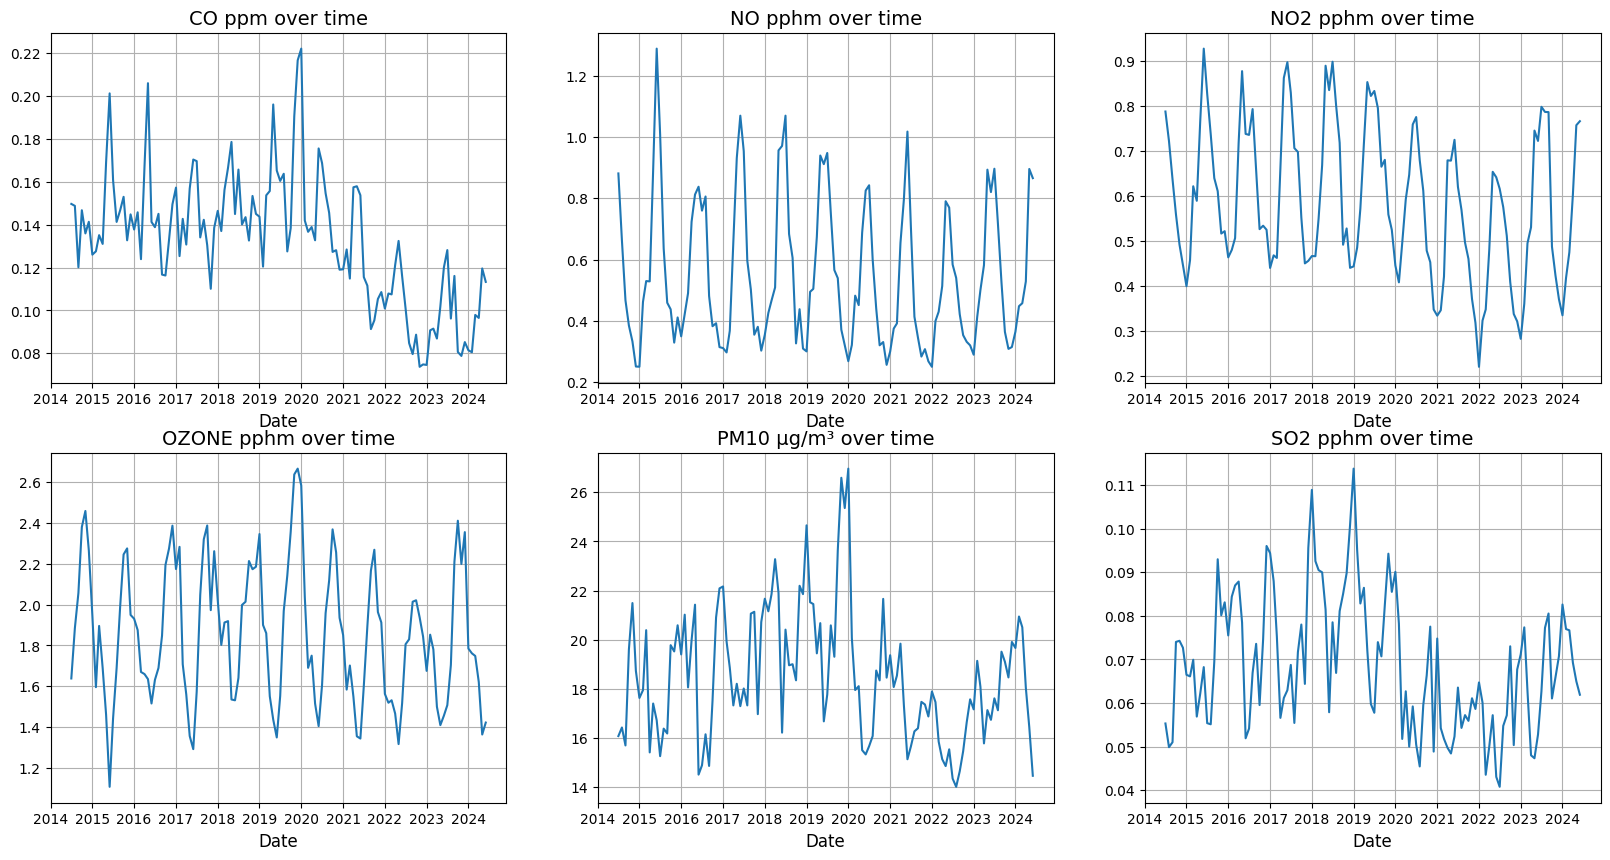

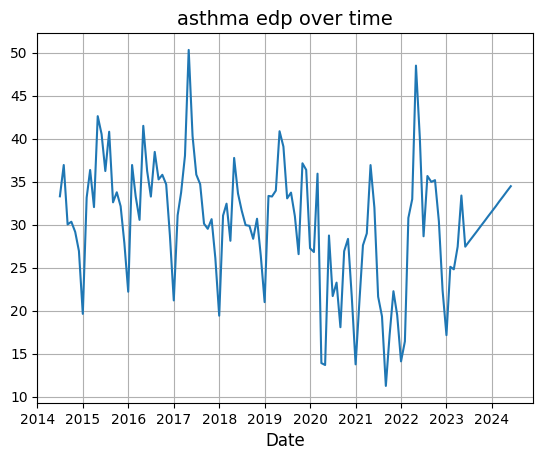

In [272]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

chosen_dataset = 18
# Load the data
df = pd.read_csv(paths[chosen_dataset])
df = df.drop(['lhd'], axis=1)
df['year-month'] = pd.to_datetime(df['year-month'])

df = df.groupby('year-month').mean().reset_index()

print(df)
plt.figure(figsize=(20, 10))
i=1
for pol in pollutant_columns:
    plt.subplot(2,3,i)
    plt.plot(df['year-month'], df[pol], label=pol)
    plt.title(pol + ' over time', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.grid(True)
    i = i + 1
plt.show()

plt.plot(df['year-month'], df['asthma edp'], label='asthma edp')
plt.title('asthma edp over time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.grid(True)
plt.show()


ADF Statistic: -0.5308262718769068
p-value: 0.8858592894610009
year-month    datetime64[ns]
CO ppm               float64
NO pphm              float64
NO2 pphm             float64
OZONE pphm           float64
PM10 µg/m³           float64
SO2 pphm             float64
dtype: object


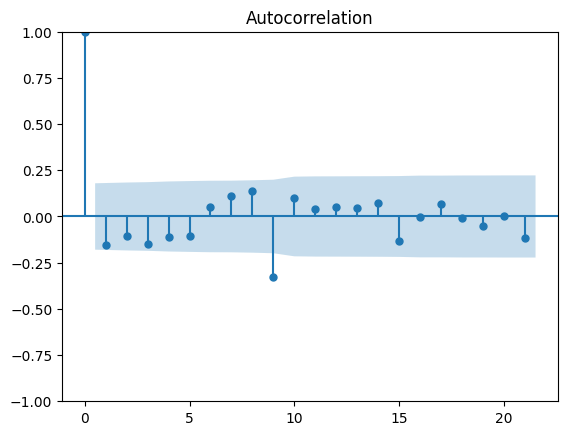

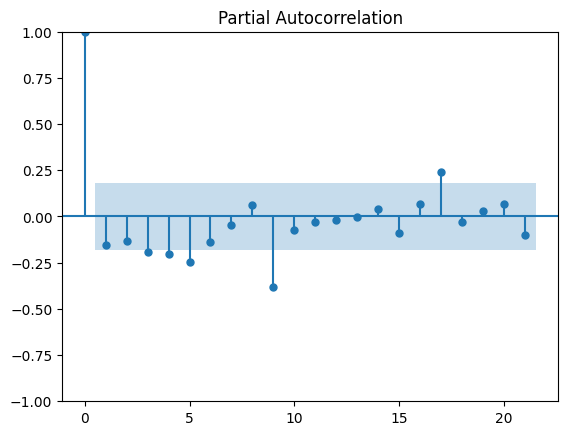

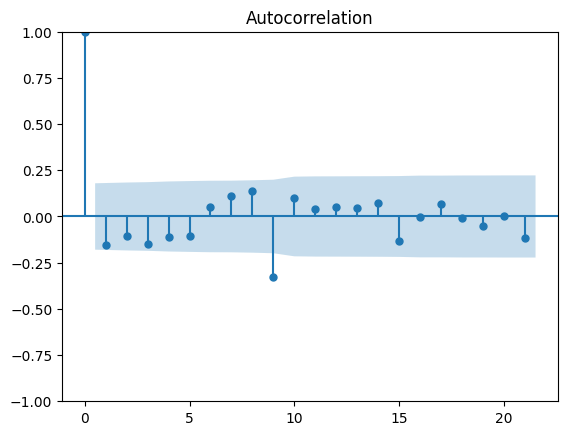

In [283]:
# Check for stationary
result = adfuller(df['CO ppm'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# difference data to make stationary
df_data_diff = df[pollutant_columns].diff().dropna()
df_data_diff.insert(0, "year-month", df['year-month'], True)

print(df_data_diff.dtypes)
# Determine ARIMA p and q value
from statsmodels.graphics.tsaplots import plot_pacf 
from statsmodels.graphics.tsaplots import plot_acf 
plot_pacf(df_data_diff['CO ppm'])
plot_acf(df_data_diff['CO ppm'])

- P was chosen at 17 as it is the next most significant lag out of the limit.
- Q was chosen as 8 for the same reason.

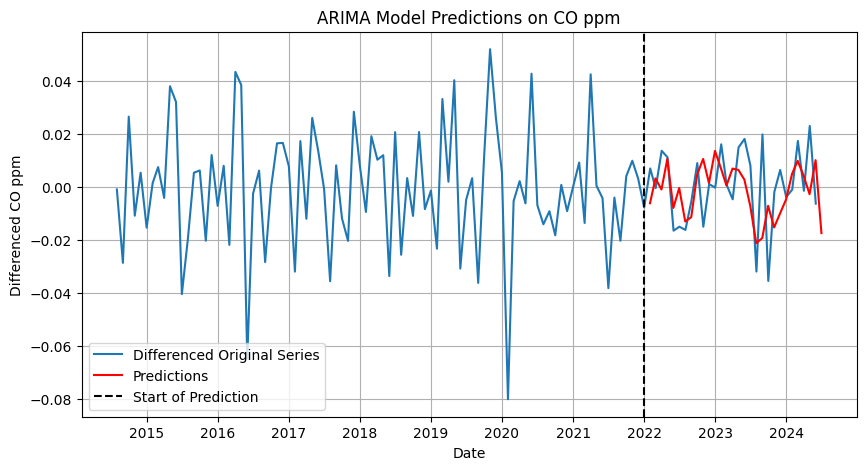

MAE: 0.01
MSE: 0.00
RMSE: 0.01


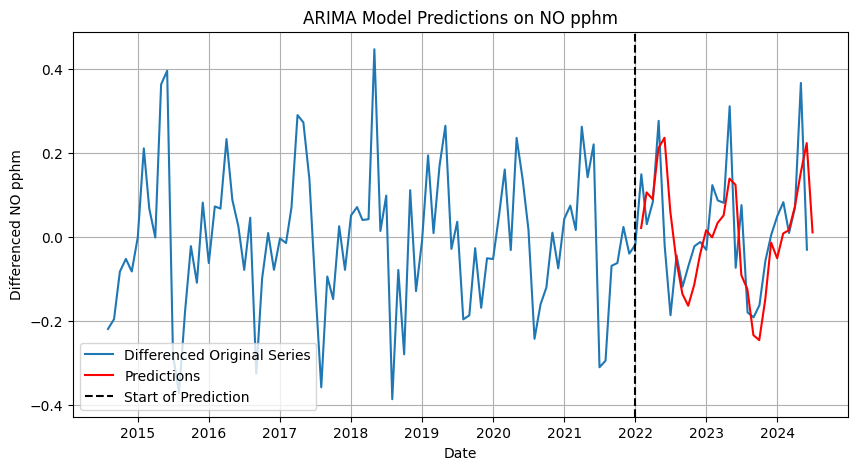

MAE: 0.07
MSE: 0.01
RMSE: 0.08


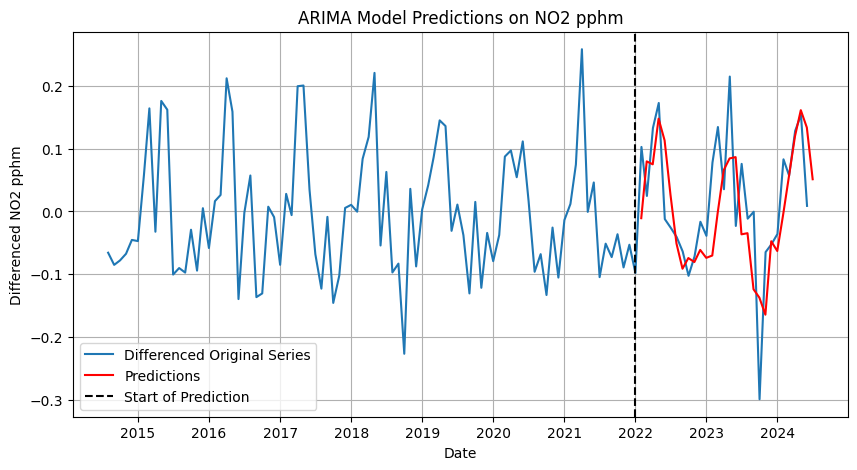

MAE: 0.05
MSE: 0.00
RMSE: 0.06


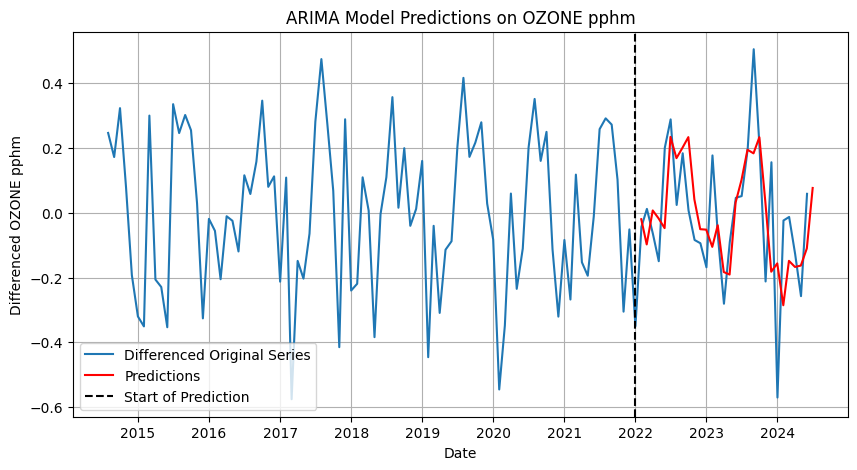

MAE: 0.11
MSE: 0.02
RMSE: 0.15


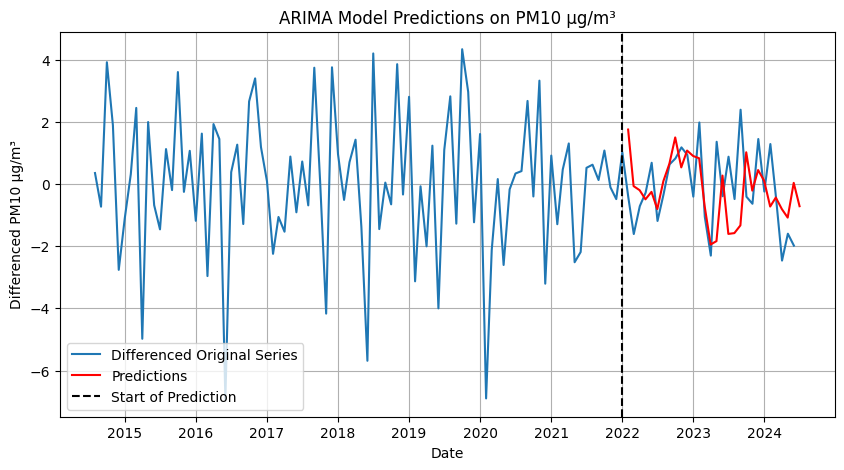

MAE: 0.98
MSE: 1.40
RMSE: 1.18


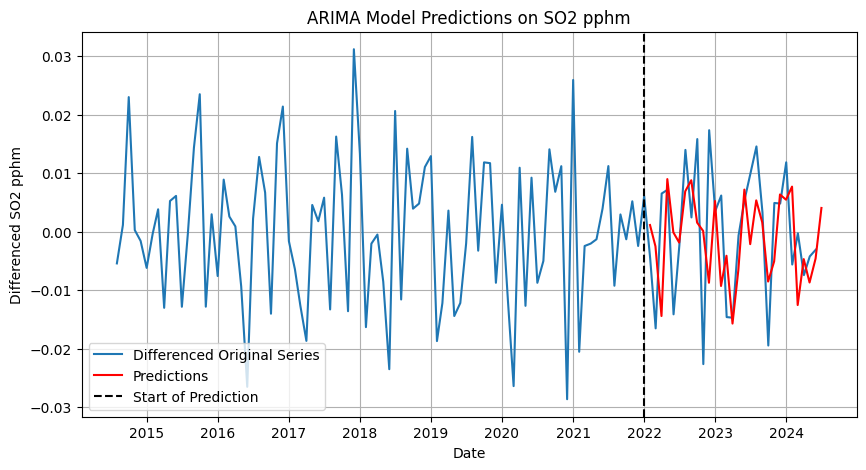

MAE: 0.01
MSE: 0.00
RMSE: 0.01


In [310]:
i=1

for pol in pollutant_columns:
    
    train_size = int(len(df_data_diff) * 0.75)
    train, test = df_data_diff[pol][:train_size], df_data_diff[pol][train_size:]

    # Fit the ARMA(17, 8) model
    model = ARIMA(df_data_diff[pol], order=(17, 0, 8))
    model_fit = model.fit()

    # Calculate the starting point: quarter of the way from the end
    start = train_size  # Start 1/4 from the end
    end = train_size + len(test) - 1 # Predicting until the end of timeline.

    predictions = model_fit.predict(start=start, end=end)

    mae = mean_absolute_error(test, predictions)
    mse = mean_squared_error(test, predictions)
    rmse = np.sqrt(mse)

    # Generate future dates for the prediction plot
    last_date = df_data_diff['year-month'].iloc[start]
    future_dates = pd.date_range(start=last_date, periods=(end - start + 1), freq='M')

    # Create DataFrame for predictions with future dates
    predictions_df = pd.DataFrame({
        'year-month': future_dates,
        'Predicted {pol}': predictions
    })

    # Plot the differenced original series and the predictions
    plt.figure(figsize=(10, 5))
    plt.plot(df_data_diff['year-month'], df_data_diff[pol], label='Differenced Original Series')
    plt.plot(predictions_df['year-month'], predictions_df['Predicted {pol}'], label='Predictions', color='red')
    plt.axvline(x=last_date, color='black', linestyle='--', label='Start of Prediction')
    plt.legend(loc='lower left')
    plt.title('ARIMA Model Predictions on '+pol)
    plt.xlabel('Date')
    plt.ylabel('Differenced '+pol)
    plt.grid(True)
    plt.show()
    print(f'MAE: {mae:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}')
    i = i + 1
    
    



### Asthma ED Presentations

ADF Statistic: -2.0751389856940814
p-value: 0.2546281117779826
0      33.284615
1      36.923077
2      30.015385
3      30.330769
4      29.146154
         ...    
115    32.117160
116    32.702959
117    33.288757
118    33.874556
119    34.460355
Name: asthma edp, Length: 120, dtype: float64
    year-month  asthma edp
1   2014-08-01    3.638462
2   2014-09-01   -6.907692
3   2014-10-01    0.315385
4   2014-11-01   -1.184615
5   2014-12-01   -2.223077
..         ...         ...
115 2024-02-01    0.585799
116 2024-03-01    0.585799
117 2024-04-01    0.585799
118 2024-05-01    0.585799
119 2024-06-01    0.585799

[119 rows x 2 columns]


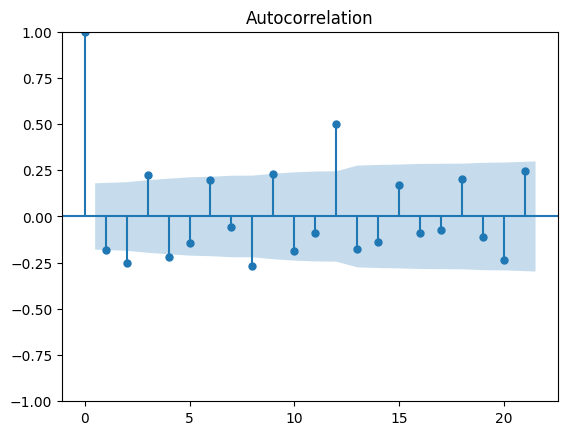

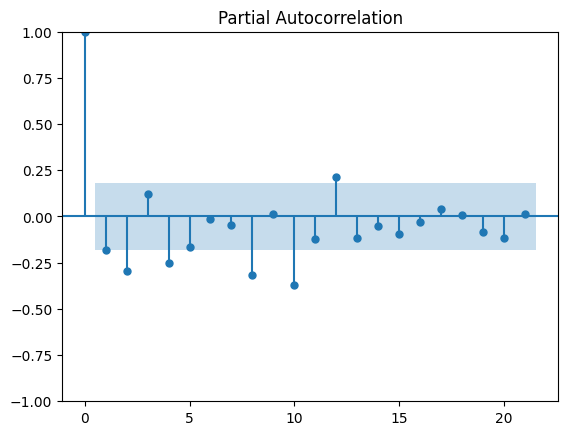

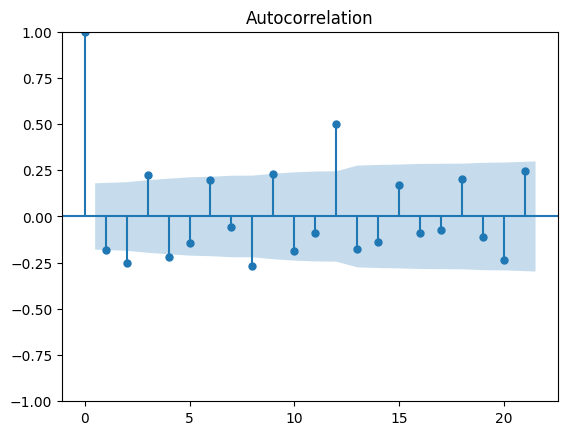

In [273]:
# Check for stationary
result = adfuller(df['asthma edp'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

print(df['asthma edp'])

# difference data to make stationary
edp_diff = df['asthma edp'].diff().dropna()

df_data_diff = pd.DataFrame({
    'year-month': df['year-month'].iloc[1:],
    'asthma edp': edp_diff
})

print (df_data_diff)

# Determine ARIMA p and q value
from statsmodels.graphics.tsaplots import plot_pacf 
from statsmodels.graphics.tsaplots import plot_acf 
plot_pacf(df_data_diff['asthma edp'])
plot_acf(df_data_diff['asthma edp'])




- P was chosen at 10 as it is the next most significant lag out of the limit.
- Q was chosen as 13 for the same reason.

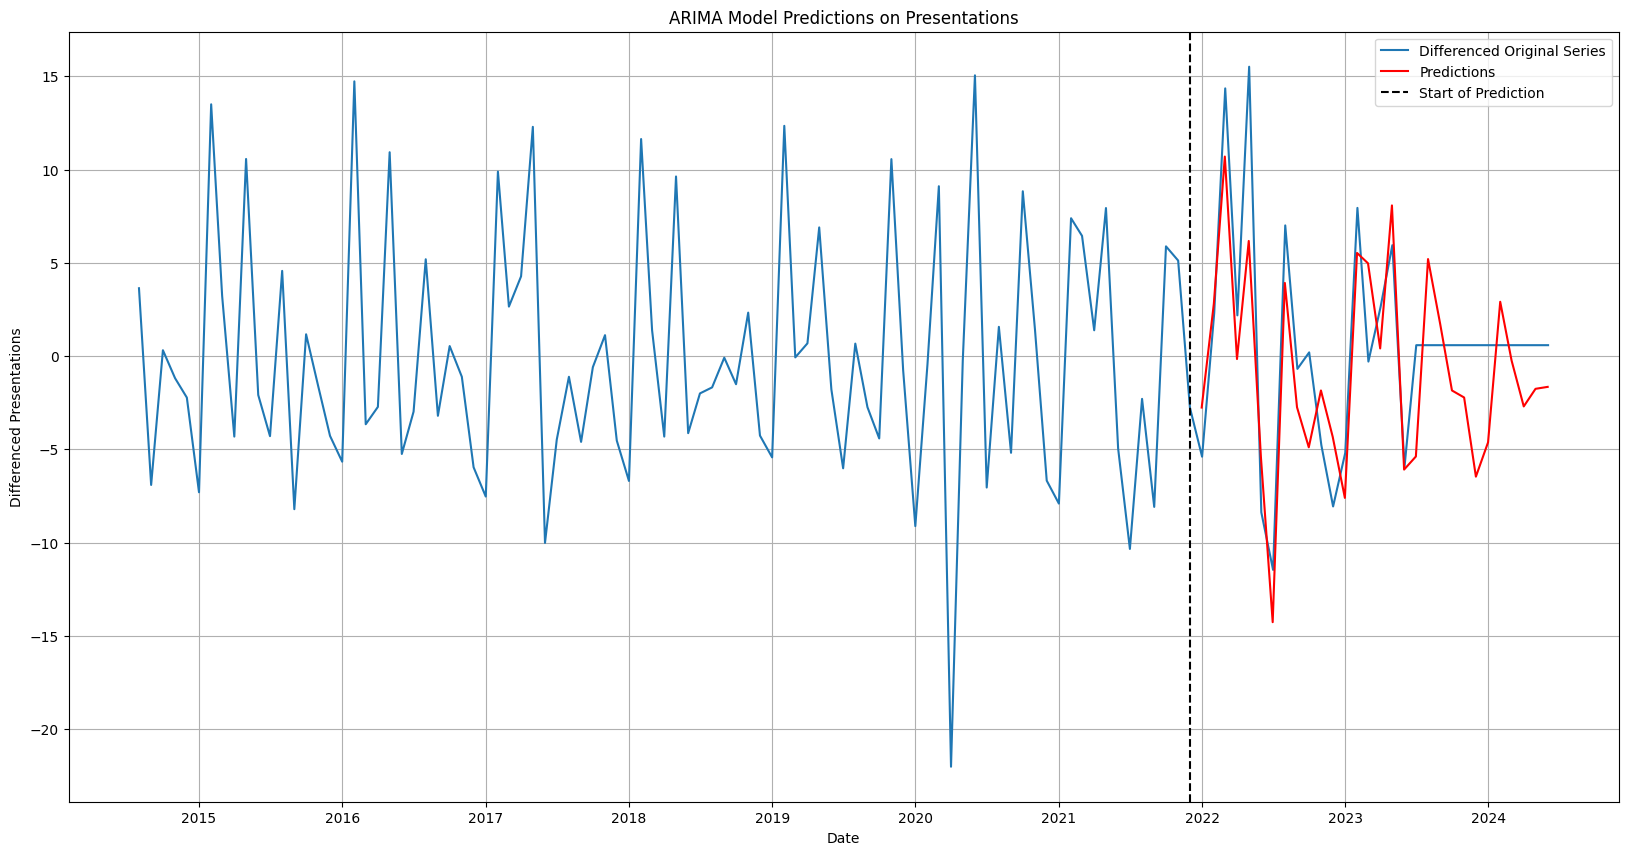

MAE: 3.20
MSE: 13.91
RMSE: 3.73


In [277]:
plt.figure(figsize=(20, 10))

train_size = int(len(df_data_diff) * 0.75)
train, test = df_data_diff['asthma edp'][:train_size], df_data_diff['asthma edp'][train_size:]

# Fit the ARMA(1, 1) model
model = ARIMA(df_data_diff['asthma edp'], order=(10, 0, 13))
model_fit = model.fit()

# Calculate the starting point: quarter of the way from the end
start = train_size  # Start 1/4 from the end
end = train_size + len(test) - 1 # Predicting 20 steps from this starting point

predictions = model_fit.predict(start=start, end=end)

mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)

# Generate future dates for the prediction plot
last_date = df['year-month'].iloc[start]
future_dates = pd.date_range(start=last_date, periods=(end - start + 1), freq='M')

# Create DataFrame for predictions with future dates
predictions_df = pd.DataFrame({
    'year-month': future_dates,
    'Predicted Presentations': predictions
})

# Plot the differenced original series and the predictions
plt.plot(df_data_diff['year-month'], df_data_diff['asthma edp'], label='Differenced Original Series')
plt.plot(predictions_df['year-month'], predictions_df['Predicted Presentations'], label='Predictions', color='red')
plt.axvline(x=last_date, color='black', linestyle='--', label='Start of Prediction')
plt.legend()
plt.title('ARIMA Model Predictions on Presentations')
plt.xlabel('Date')
plt.ylabel('Differenced Presentations')
plt.grid(True)
plt.show()

# Print evaluation results
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')